
# Visualizing Breast Cancer Wisconsin (Prognostic) Data Set


In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
from azureml import Workspace
import seaborn as sns

##### loading the data

In [17]:
wk= Workspace()
df=wk.datasets['Breast_Cancer.csv']
data=df.to_dataframe()



In [3]:
data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.300100,0.147100,...,17.33,184.60,2019.0,0.16220,0.66560,0.71190,0.26540,0.4601,0.11890,NaN
1,842517,M,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.086900,0.070170,...,23.41,158.80,1956.0,0.12380,0.18660,0.24160,0.18600,0.2750,0.08902,NaN
2,84300903,M,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.197400,0.127900,...,25.53,152.50,1709.0,0.14440,0.42450,0.45040,0.24300,0.3613,0.08758,NaN
3,84348301,M,11.420,20.38,77.58,386.1,0.14250,0.28390,0.241400,0.105200,...,26.50,98.87,567.7,0.20980,0.86630,0.68690,0.25750,0.6638,0.17300,NaN
4,84358402,M,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.198000,0.104300,...,16.67,152.20,1575.0,0.13740,0.20500,0.40000,0.16250,0.2364,0.07678,NaN
5,843786,M,12.450,15.70,82.57,477.1,0.12780,0.17000,0.157800,0.080890,...,23.75,103.40,741.6,0.17910,0.52490,0.53550,0.17410,0.3985,0.12440,NaN
6,844359,M,18.250,19.98,119.60,1040.0,0.09463,0.10900,0.112700,0.074000,...,27.66,153.20,1606.0,0.14420,0.25760,0.37840,0.19320,0.3063,0.08368,NaN
7,84458202,M,13.710,20.83,90.20,577.9,0.11890,0.16450,0.093660,0.059850,...,28.14,110.60,897.0,0.16540,0.36820,0.26780,0.15560,0.3196,0.11510,NaN
8,844981,M,13.000,21.82,87.50,519.8,0.12730,0.19320,0.185900,0.093530,...,30.73,106.20,739.3,0.17030,0.54010,0.53900,0.20600,0.4378,0.10720,NaN
9,84501001,M,12.460,24.04,83.97,475.9,0.11860,0.23960,0.227300,0.085430,...,40.68,97.65,711.4,0.18530,1.05800,1.10500,0.22100,0.4366,0.20750,NaN


### Preprocessing Data

##### checking null

In [4]:

data.info()
data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

##### Cleaning the data

In [18]:
#dropping the null column
data.drop('Unnamed: 32',axis =1, inplace=True)

In [19]:
#dropping id 
data.drop('id',axis =1, inplace=True)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non-null float64
concave points_se          569 n

### Visualizing the data

##### pair-wise scatter plot

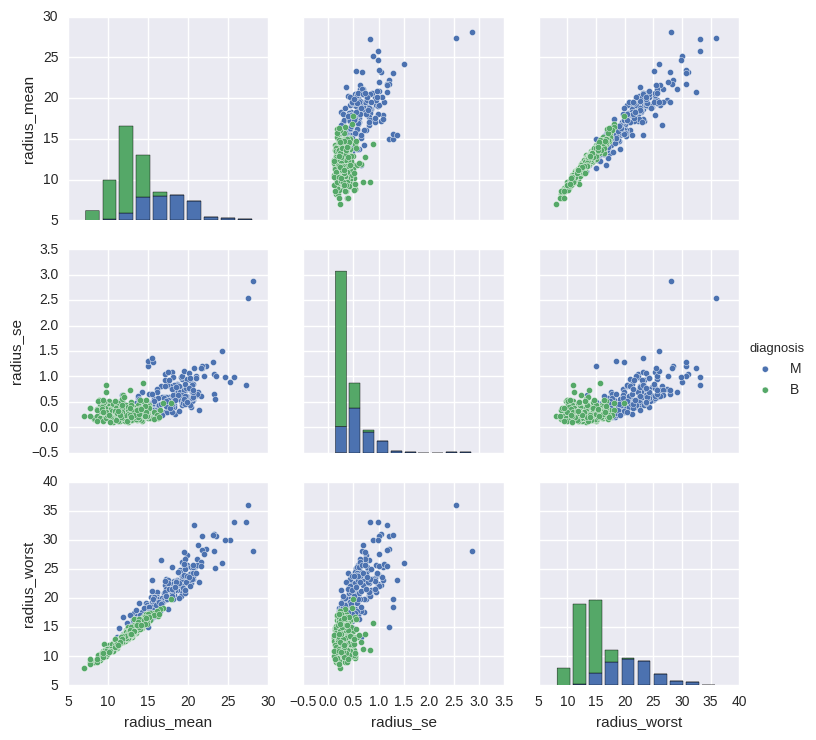

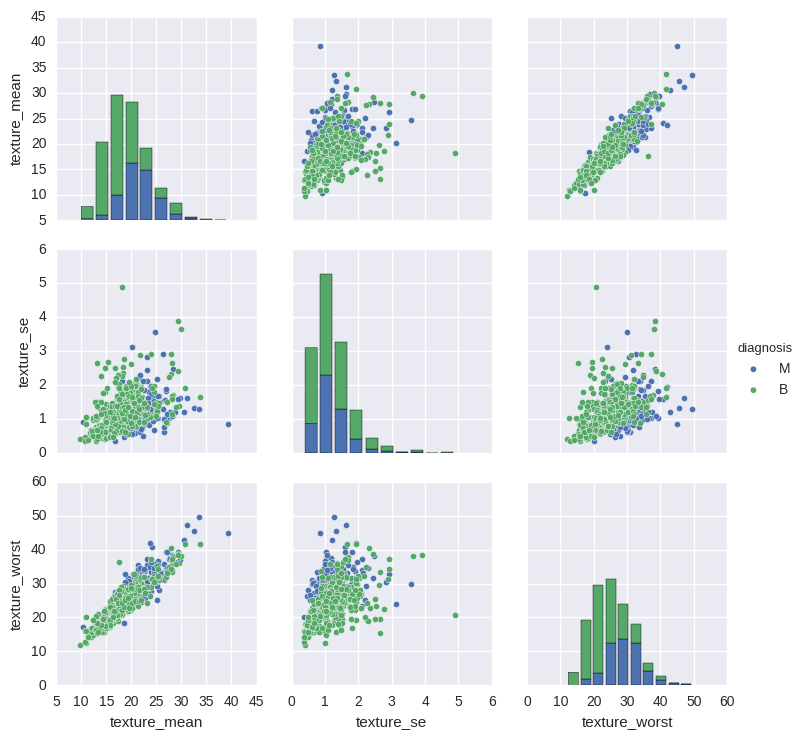

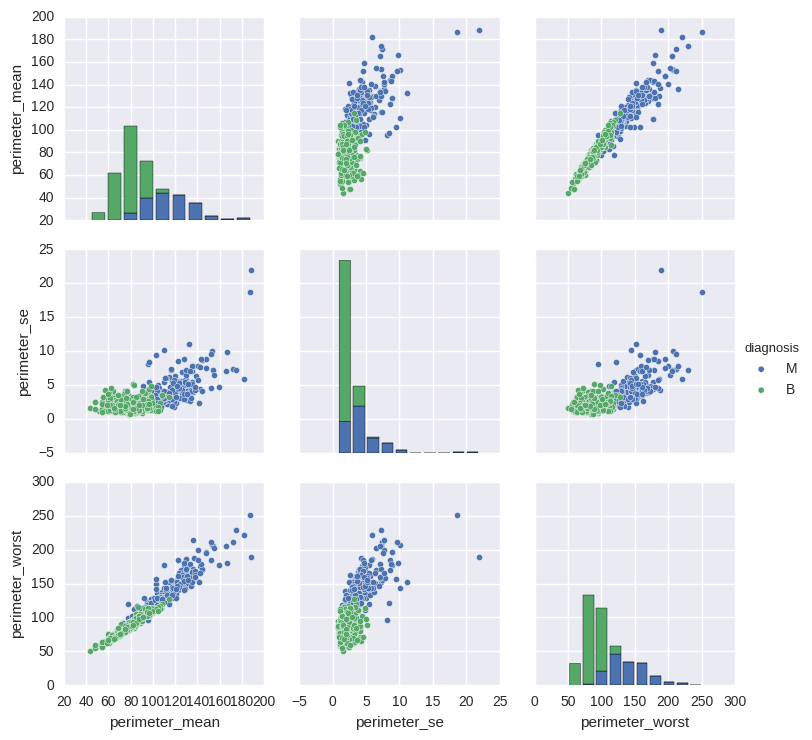

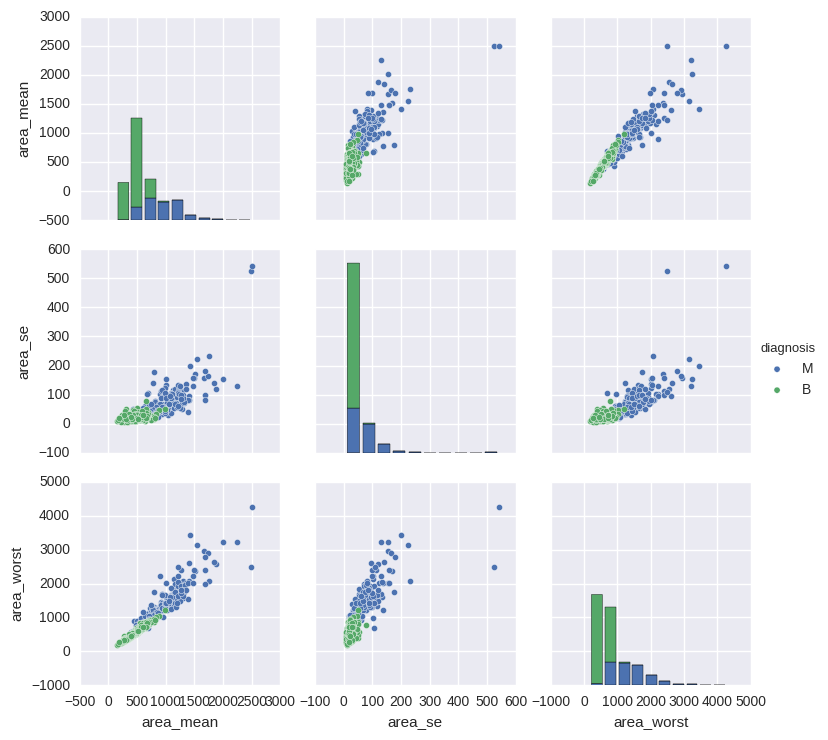

In [20]:
import seaborn as sns
radius    = data[['radius_mean','radius_se','radius_worst','diagnosis']]
texture   = data[['texture_mean','texture_se','texture_worst','diagnosis']]
perimeter = data[['perimeter_mean','perimeter_se','perimeter_worst','diagnosis']]
area      = data[['area_mean','area_se','area_worst','diagnosis']]
smoothness = data[['smoothness_mean','smoothness_se','smoothness_worst','diagnosis']]
compactness = data[['compactness_mean','compactness_se','compactness_worst','diagnosis']]
concavity = data[['concavity_mean','concavity_se','concavity_worst','diagnosis']]
symmetry = data[['symmetry_mean','symmetry_se','symmetry_worst','diagnosis']]
fractal_dimension = data[['fractal_dimension_mean','fractal_dimension_se','fractal_dimension_worst','diagnosis']]

sns.pairplot(radius,hue='diagnosis')
sns.pairplot(texture,hue='diagnosis')
sns.pairplot(perimeter,hue='diagnosis')
sns.pairplot(area,hue='diagnosis')





##### Box plot


In [21]:
feature= data.drop('diagnosis', axis=1)

/home/nbuser/anaconda3_23/lib/python3.4/site-packages/matplotlib/pyplot.py:516: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


'BOX PLOTS'

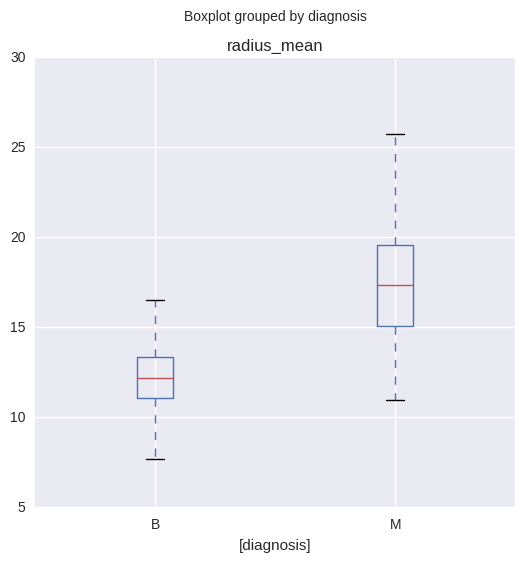

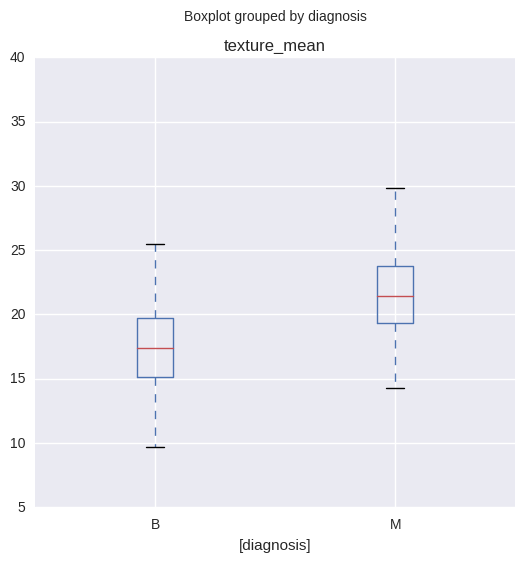

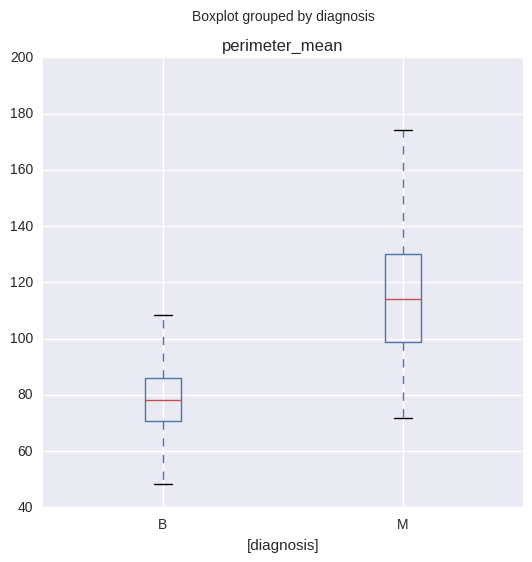

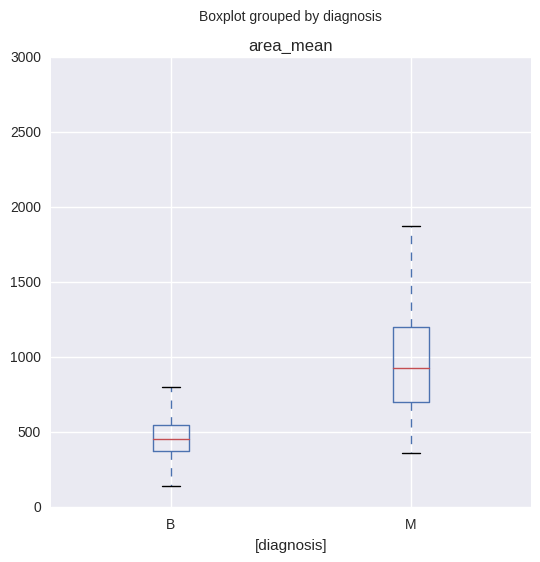

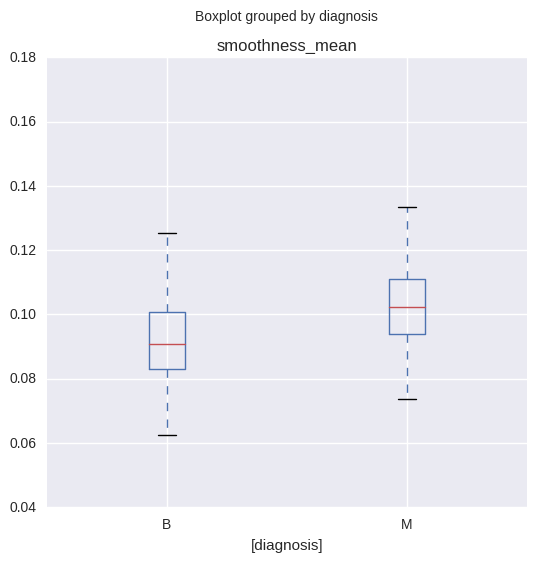

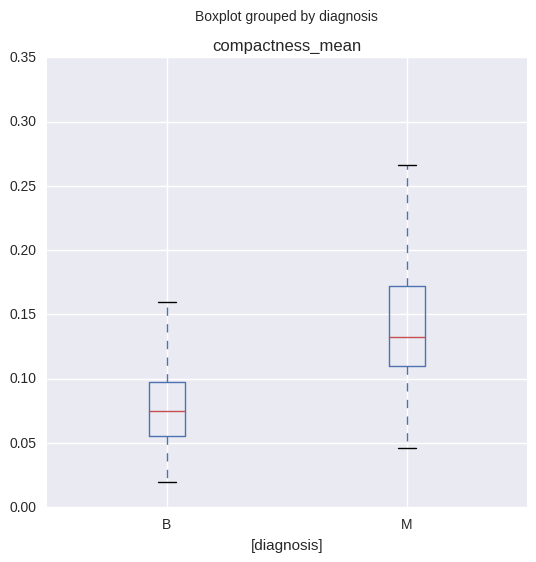

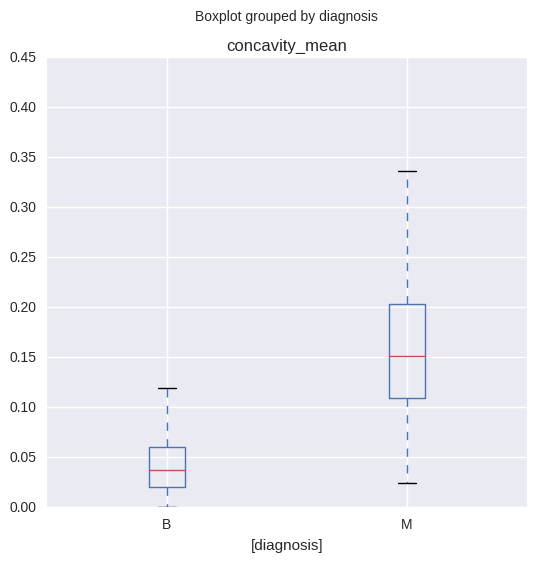

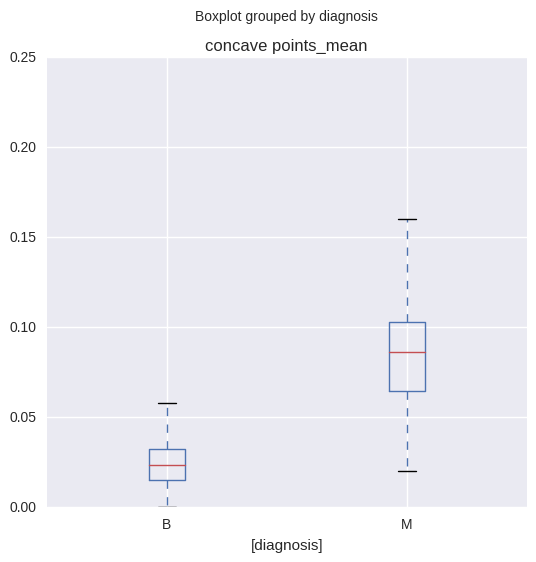

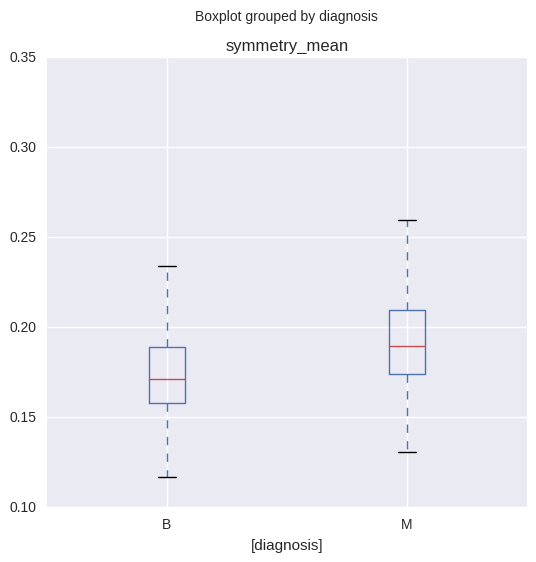

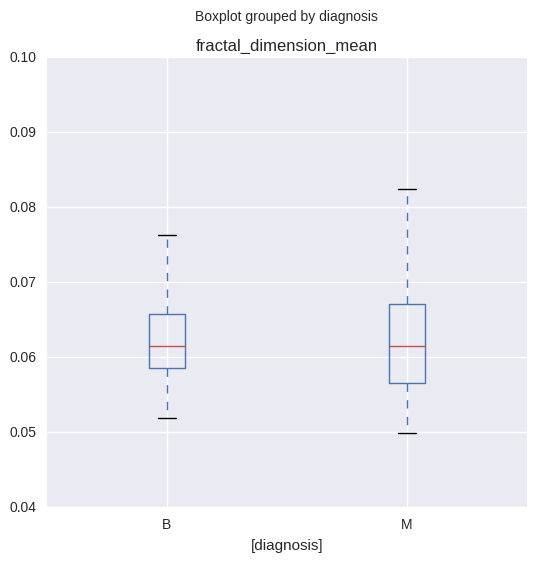

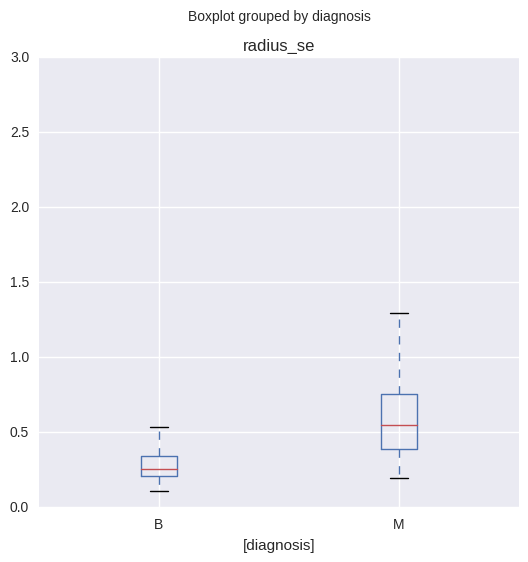

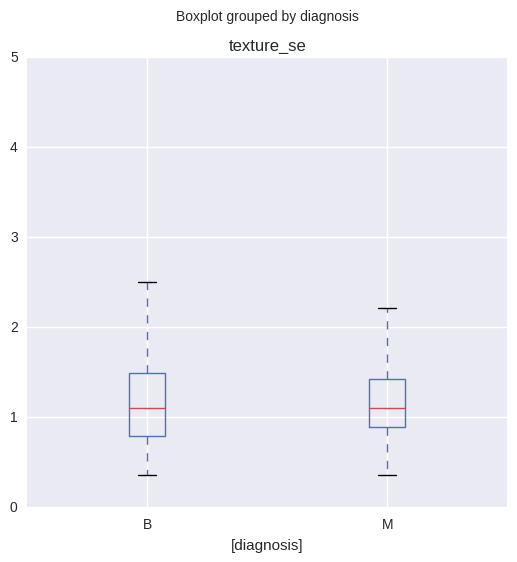

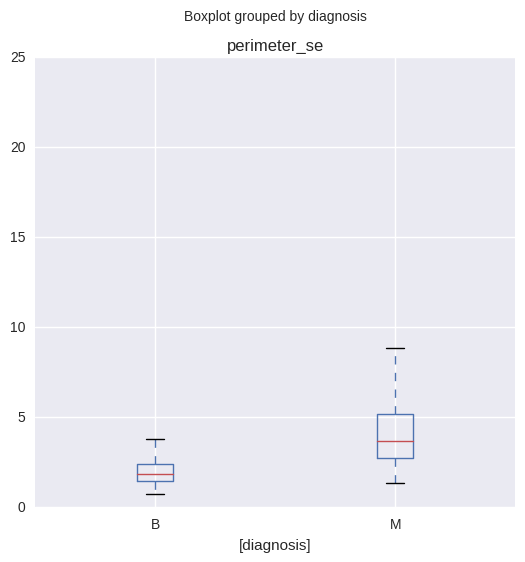

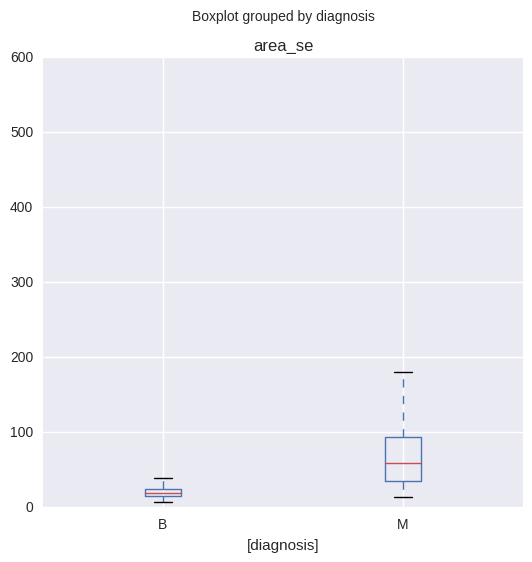

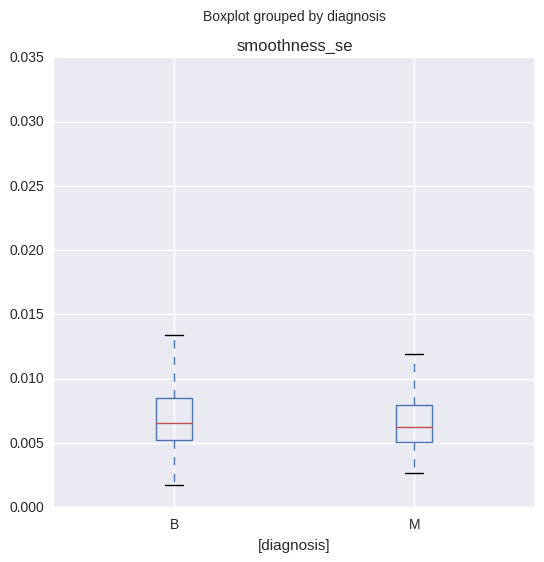

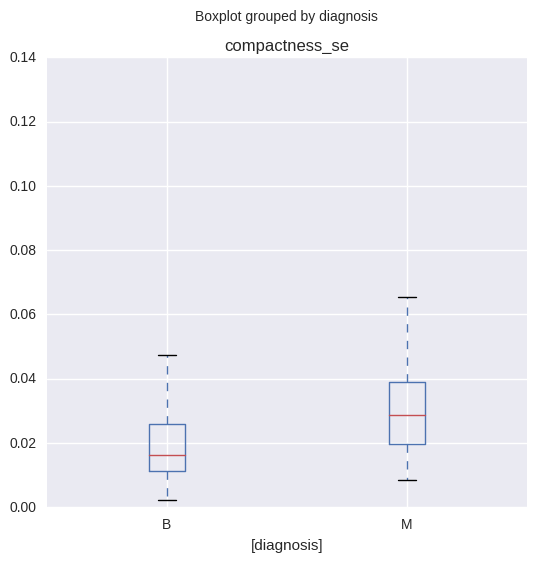

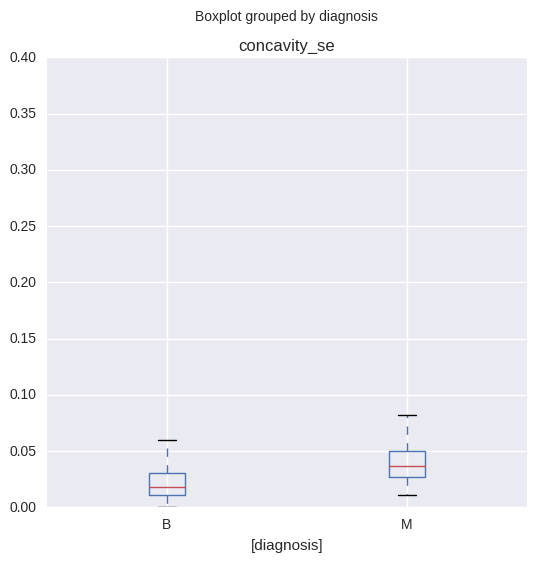

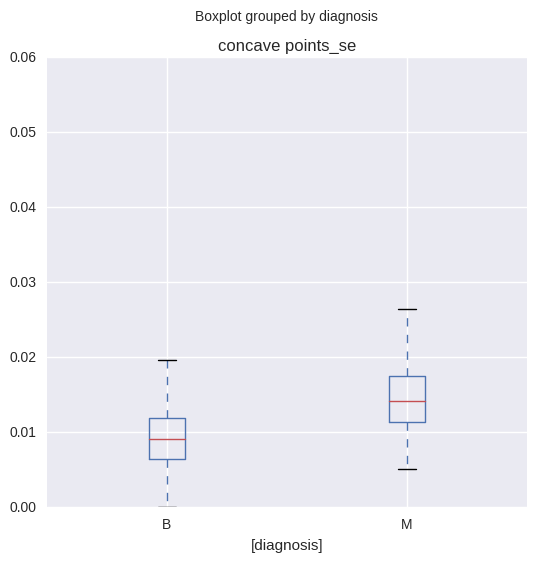

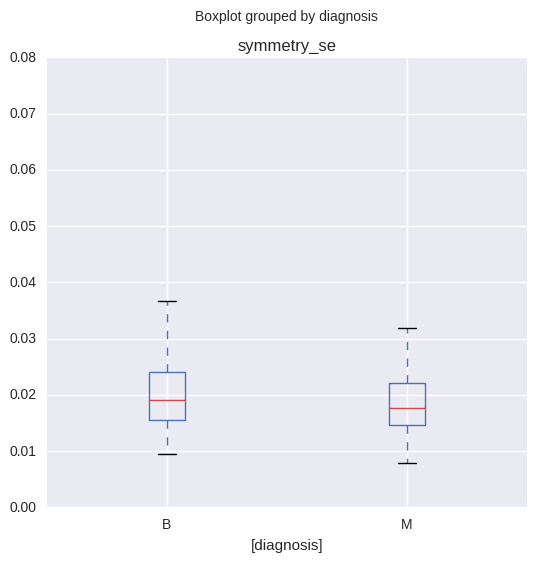

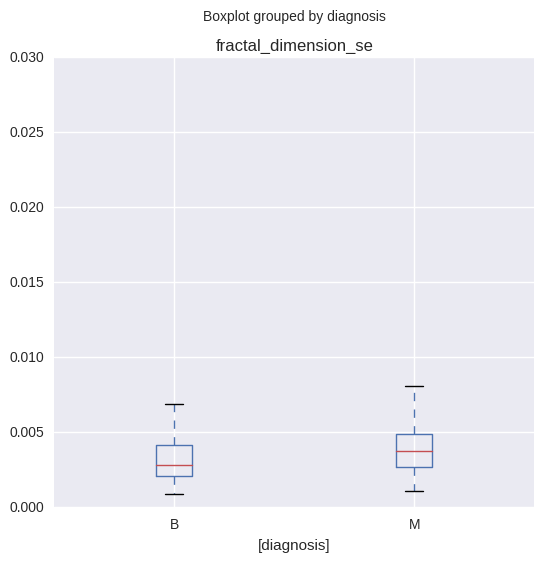

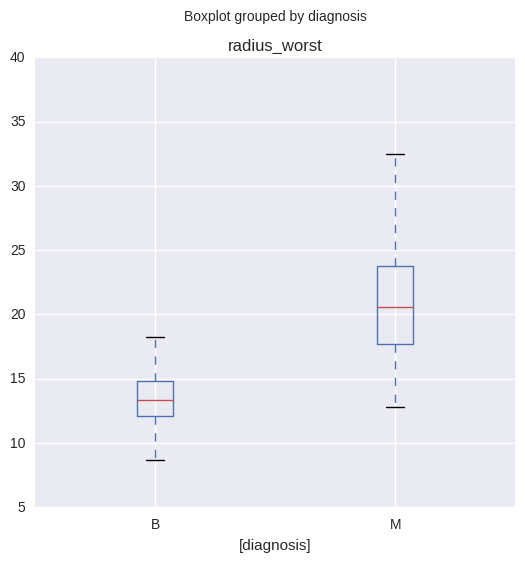

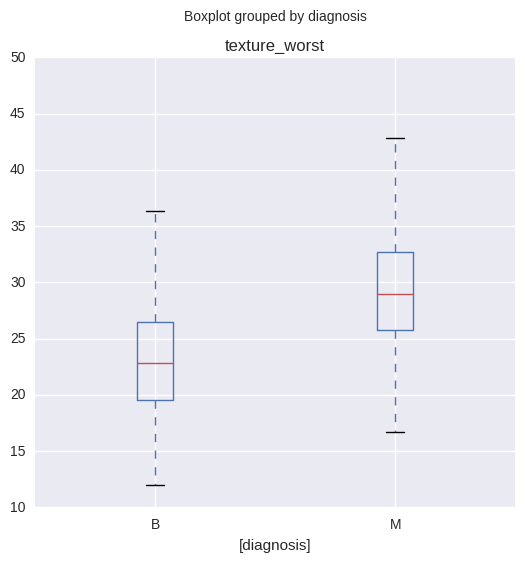

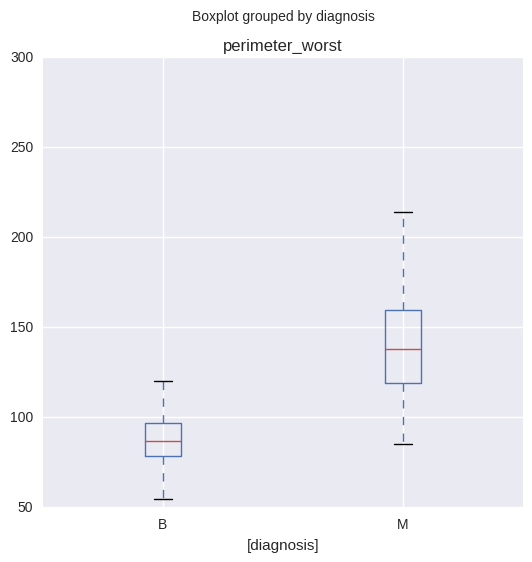

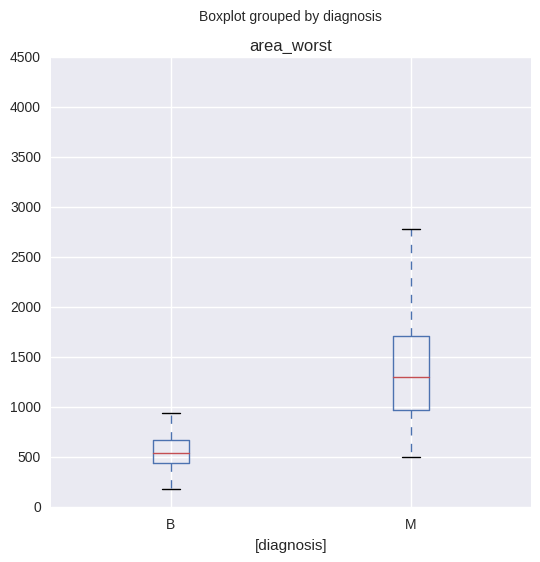

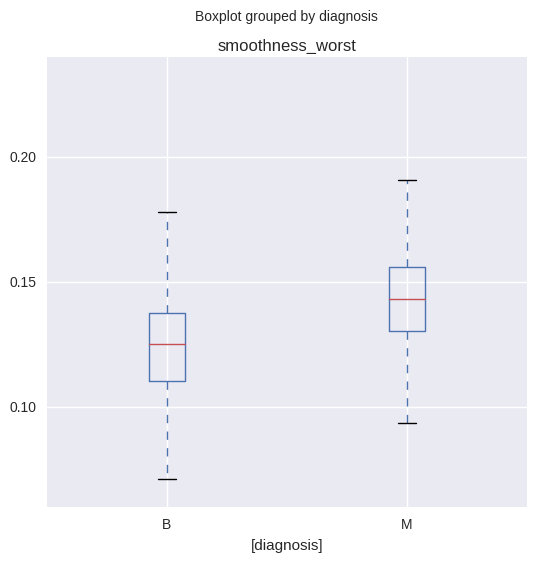

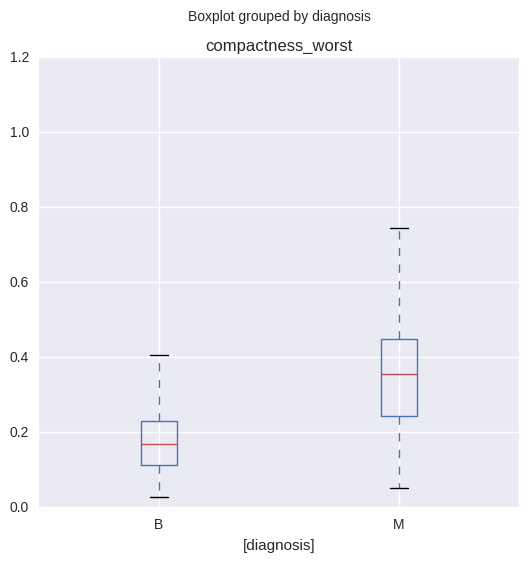

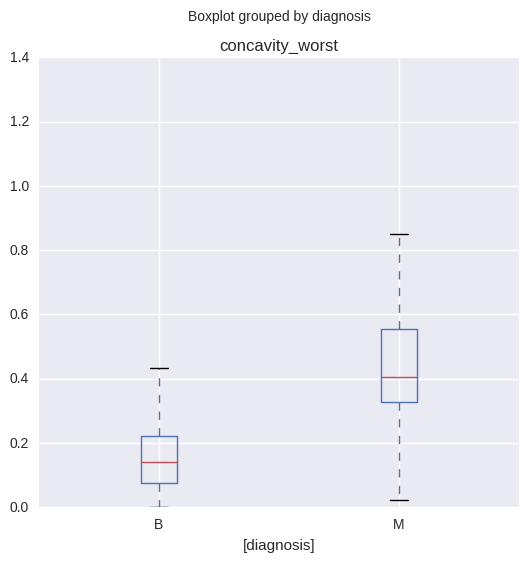

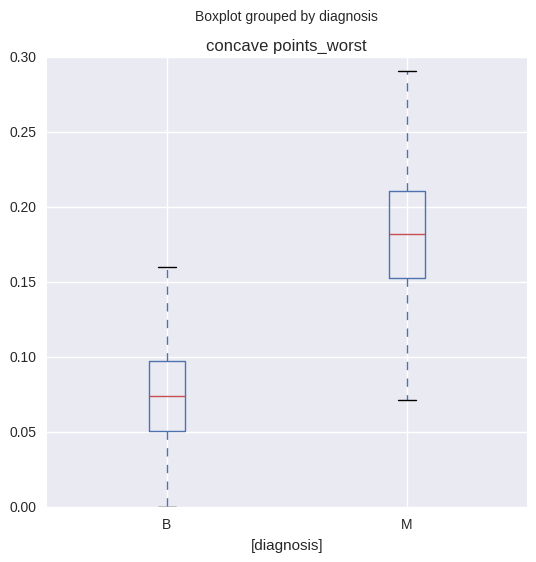

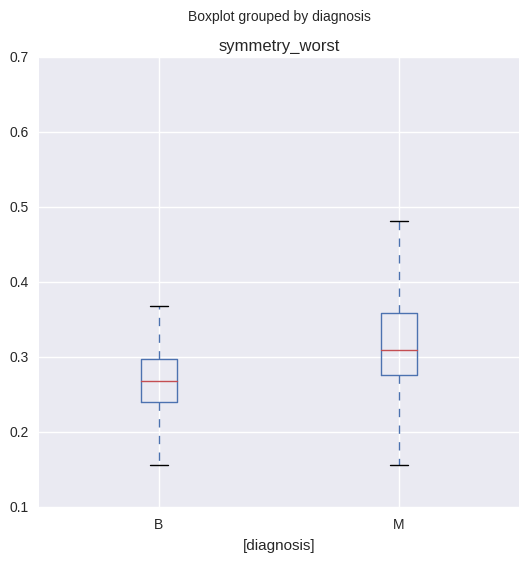

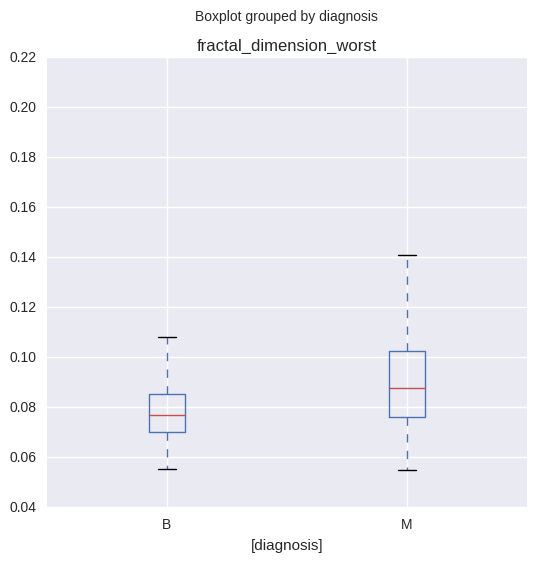

In [22]:
def diag_boxplot(df):
    for col in feature:
        if(data[col].dtype in [np.int64, np.int32, np.float64]):                  
            fig = plt.figure(figsize = (6,6))
            fig.clf()
            ax = fig.gca() 
            data.boxplot(column = [col], ax = ax, by = ['diagnosis'])          
    return('BOX PLOTS') 

diag_boxplot('diagnosis')

##### Histogram plot

/home/nbuser/anaconda3_23/lib/python3.4/site-packages/matplotlib/pyplot.py:516: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


'diagnosis'

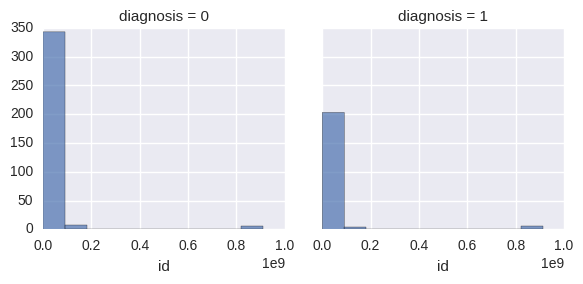

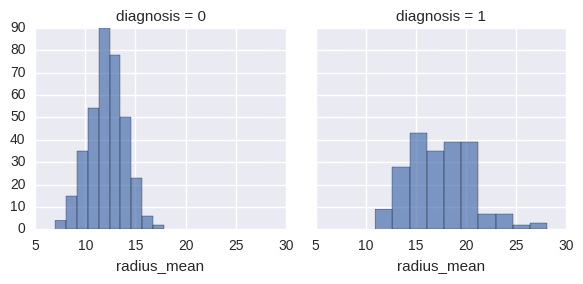

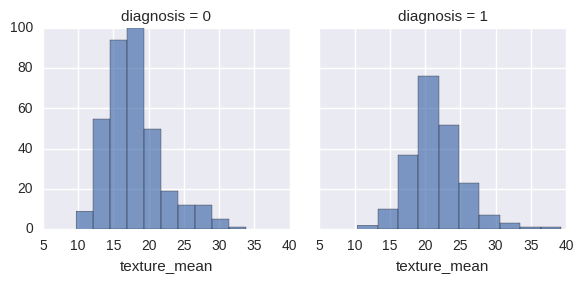

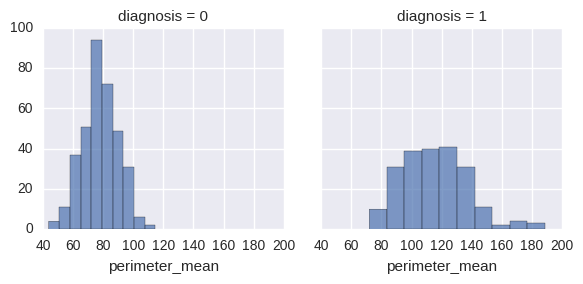

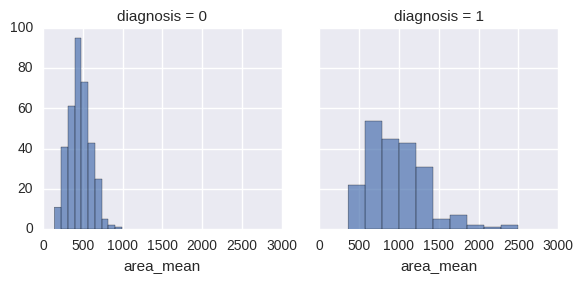

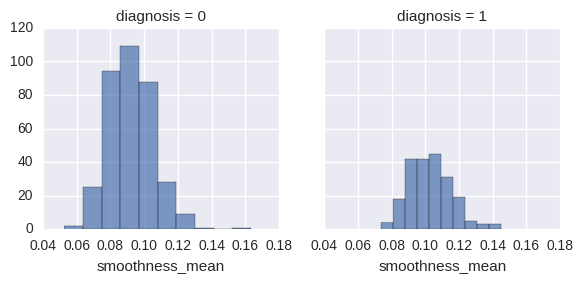

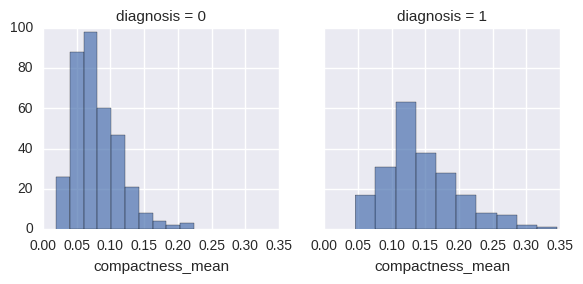

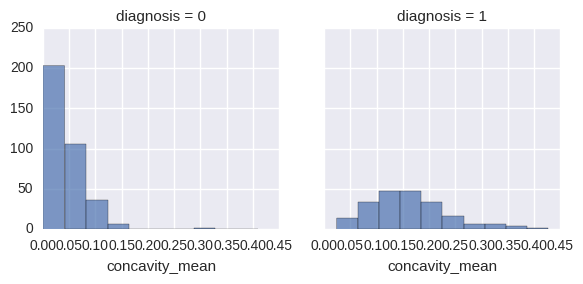

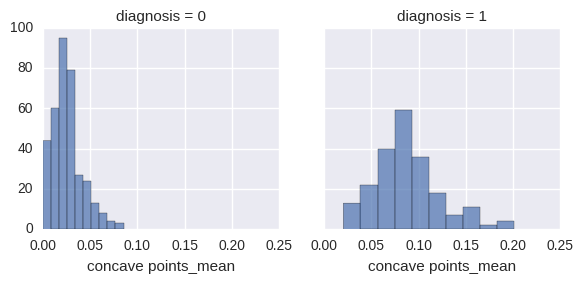

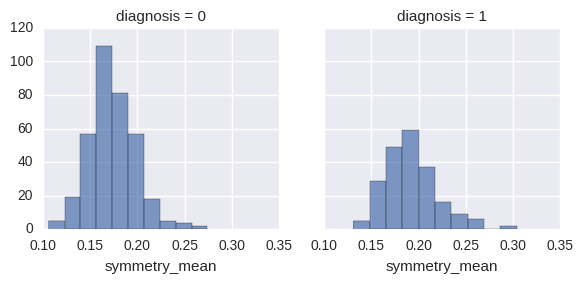

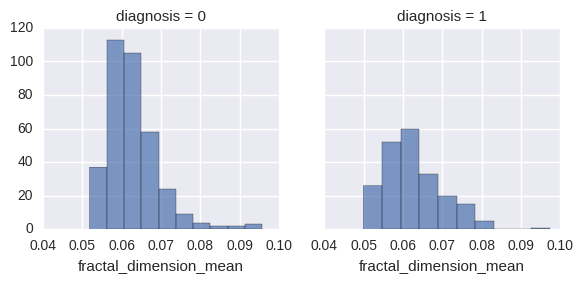

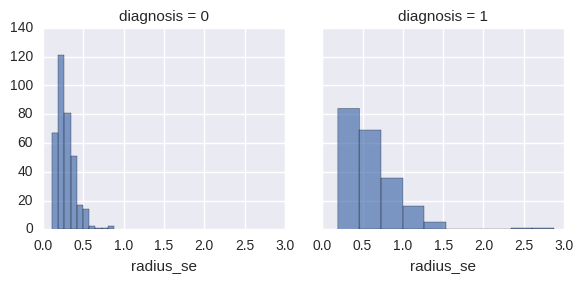

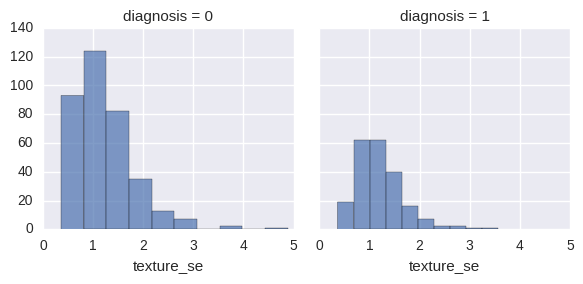

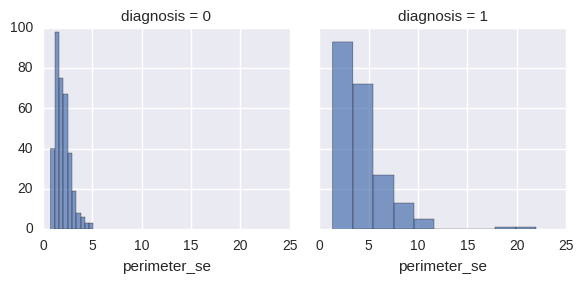

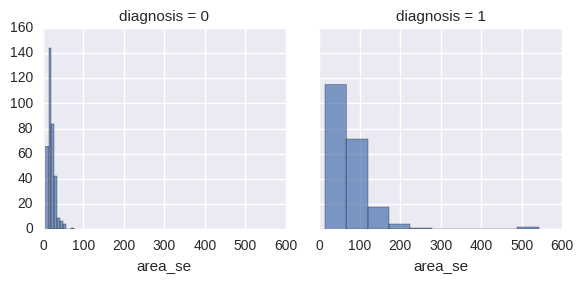

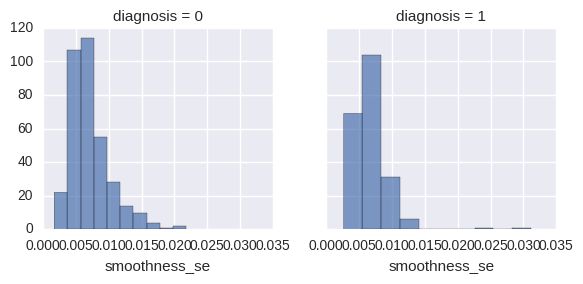

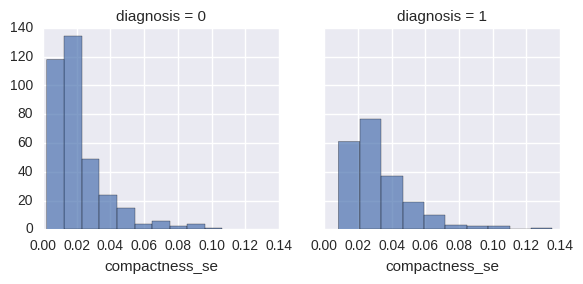

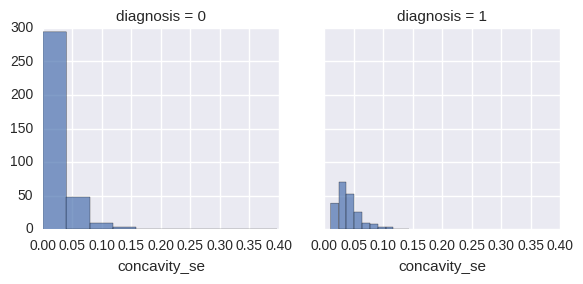

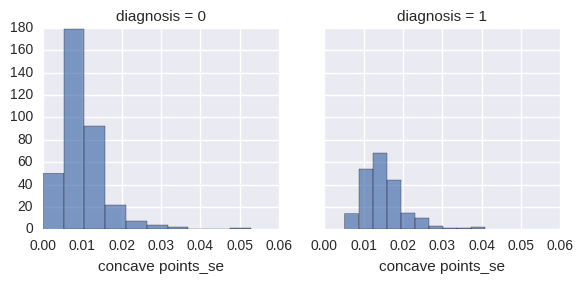

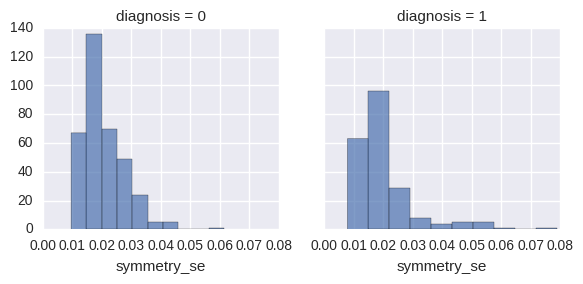

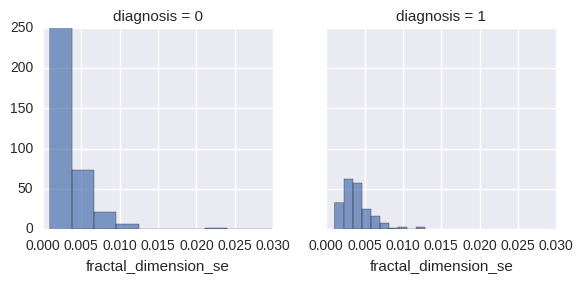

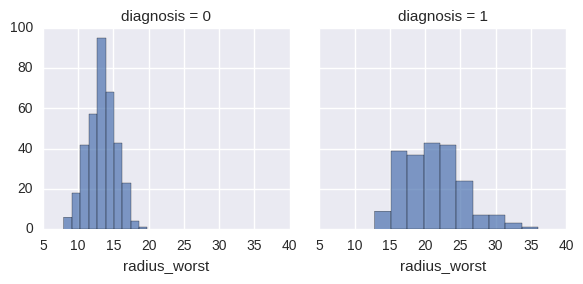

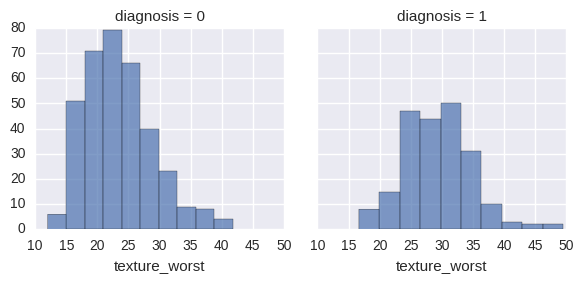

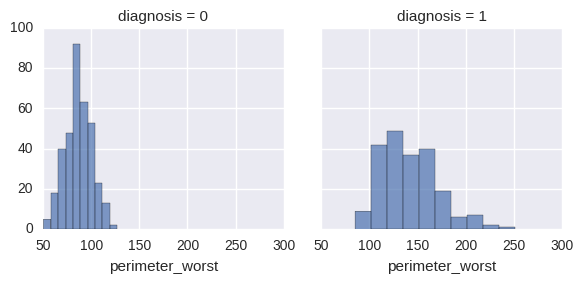

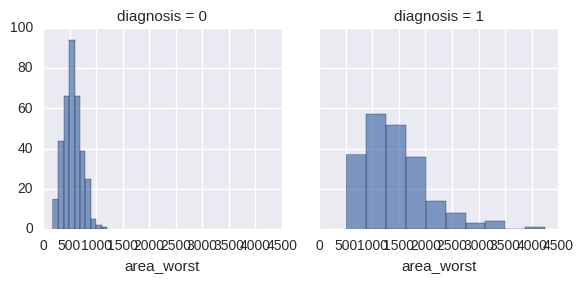

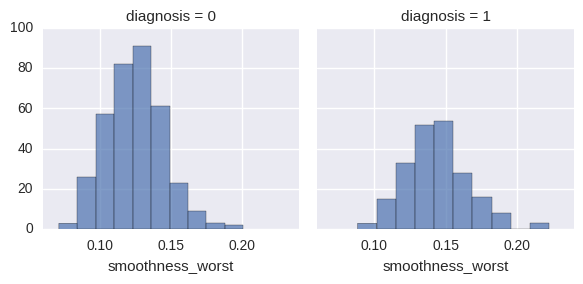

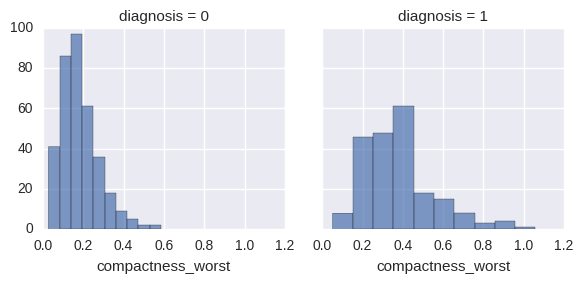

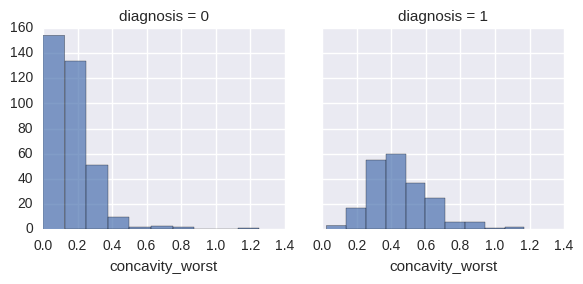

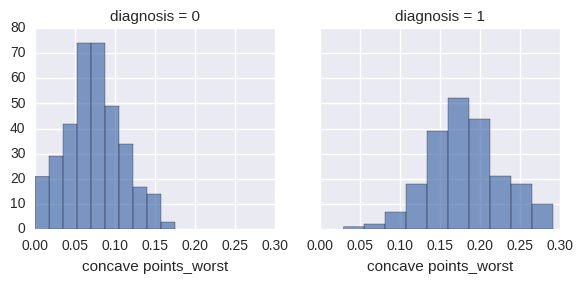

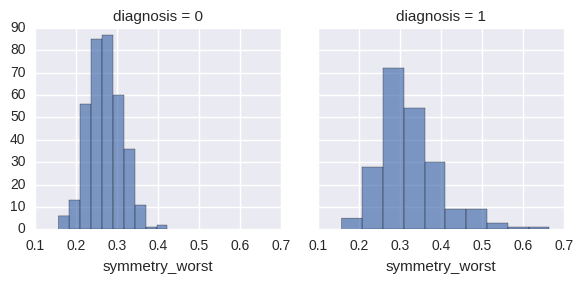

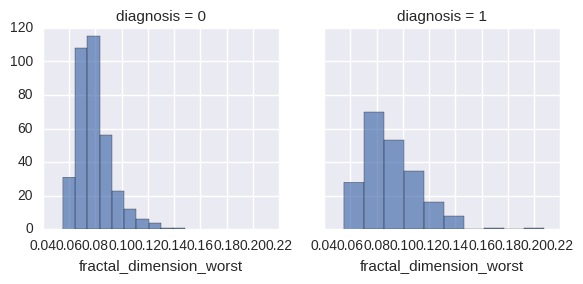

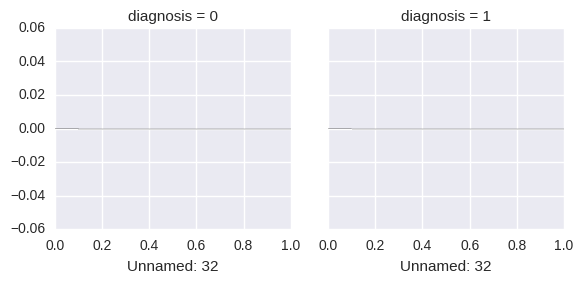

In [10]:
def cond_hists(df, plot_cols, grid_col):
# Loop over the list of columns
    for col in plot_cols:
        grid1 = sns.FacetGrid(df, col=grid_col)
        grid1.map(plt.hist, col, alpha=.7)
    return grid_col

# conditioned histogram feature with diagnosis
plot_cols2 = feature
cond_hists(data, plot_cols2, 'diagnosis')

##### Scatter plot

In [23]:
data['diagnosis']=[1 if a=='M' else 0 for a in data['diagnosis']]

/home/nbuser/anaconda3_23/lib/python3.4/site-packages/matplotlib/pyplot.py:516: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


SCATTER PLOT OF FEATURE AGAINST DIAGNOSIS M=1 and B=0


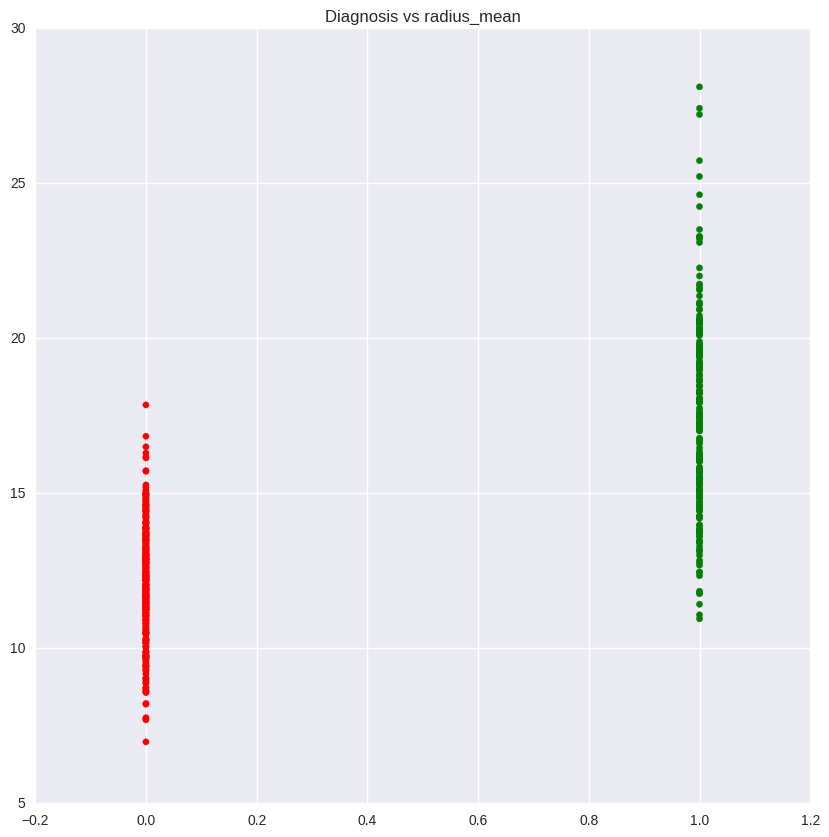

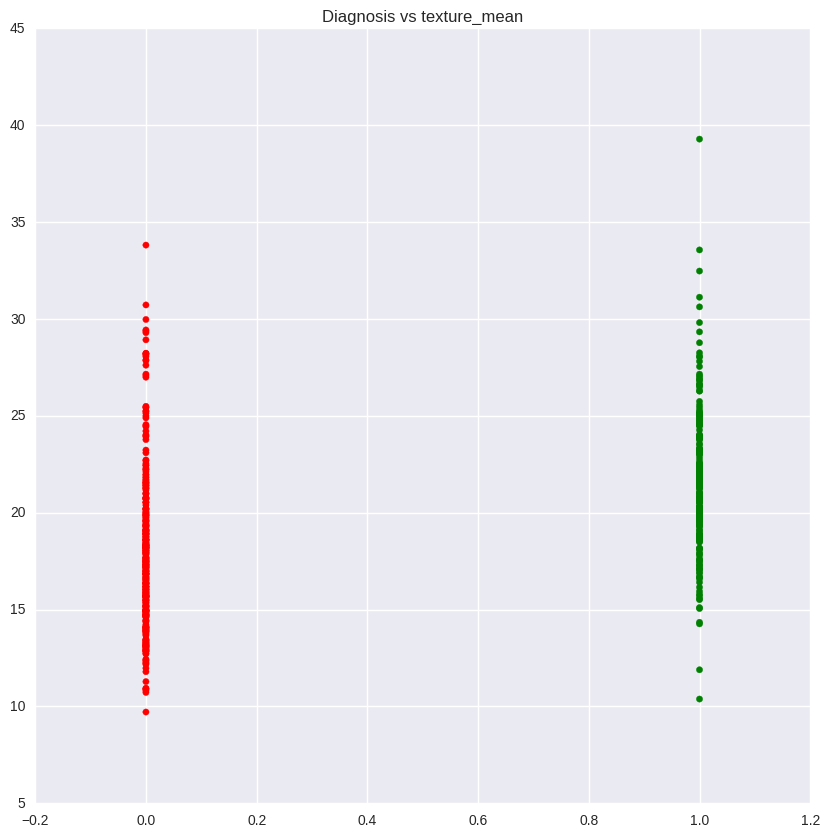

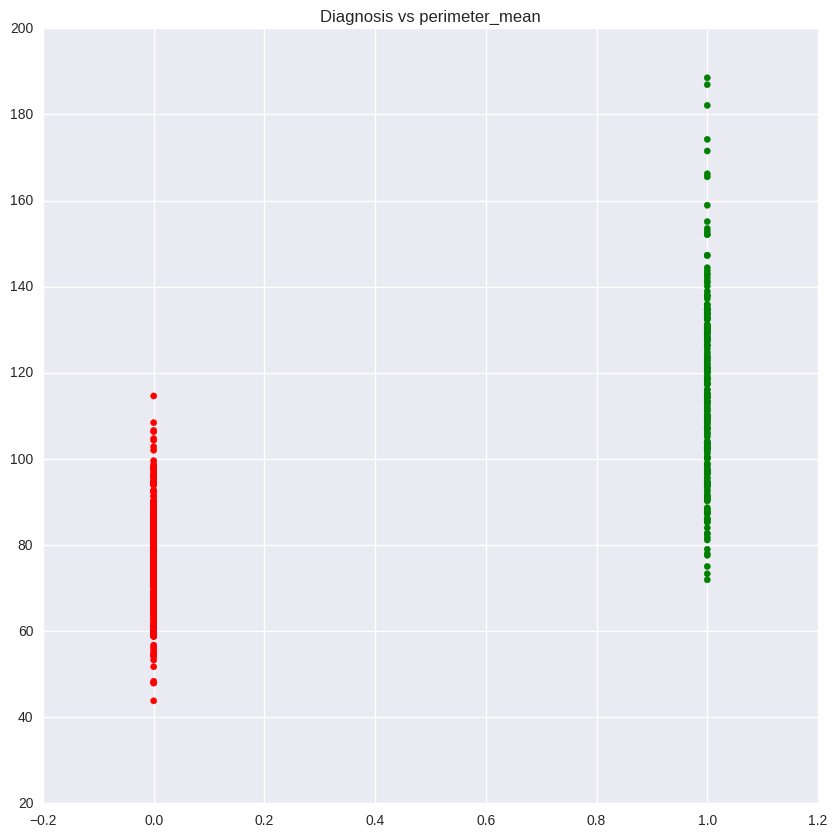

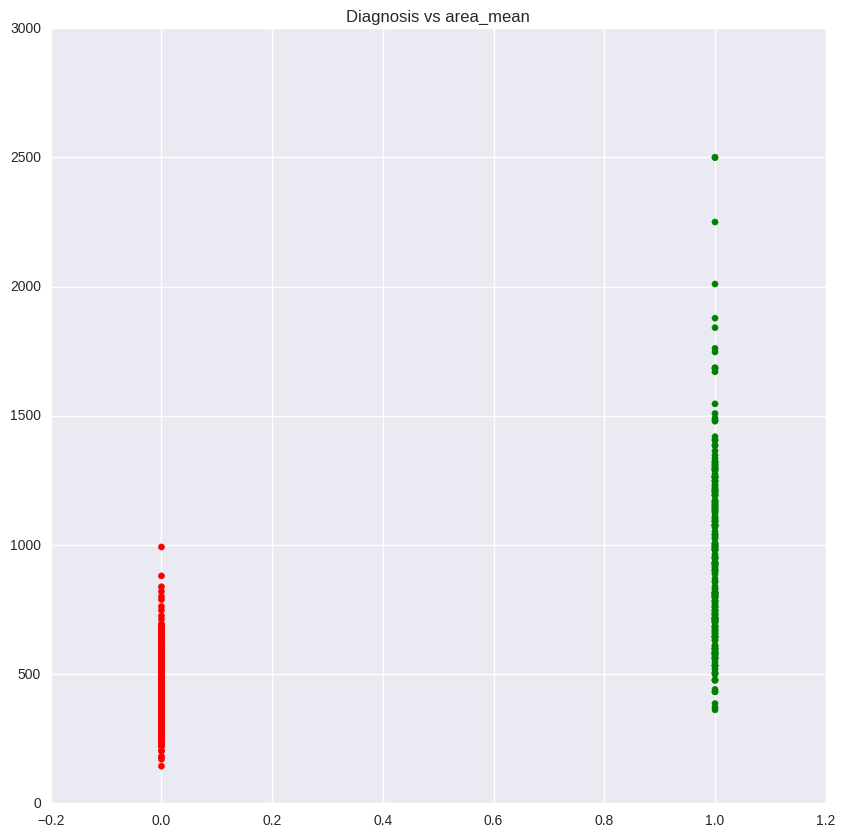

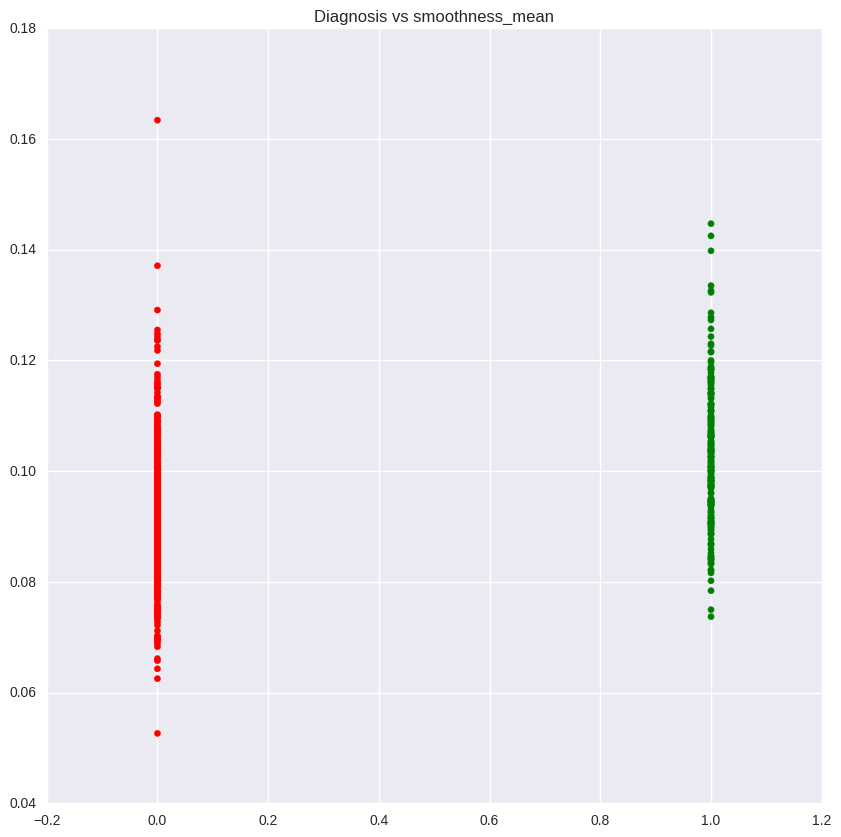

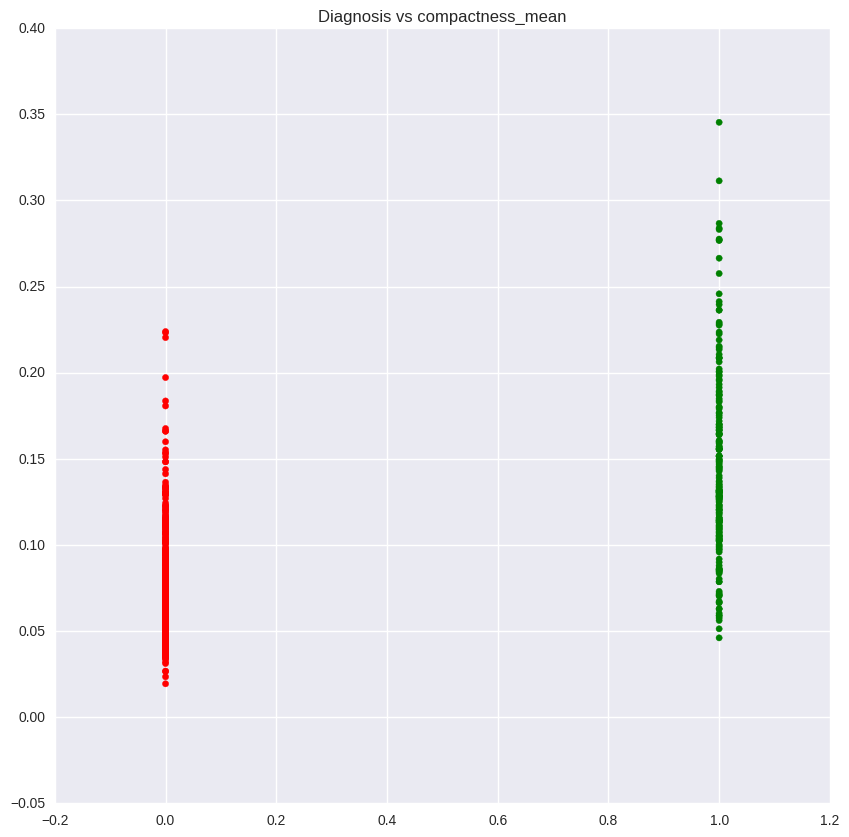

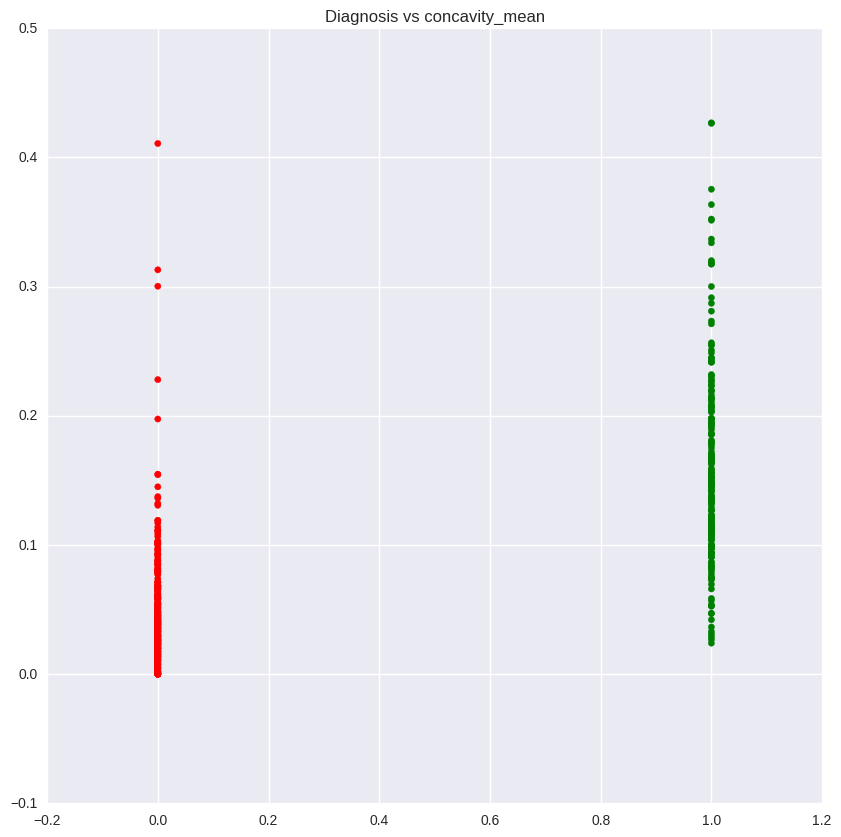

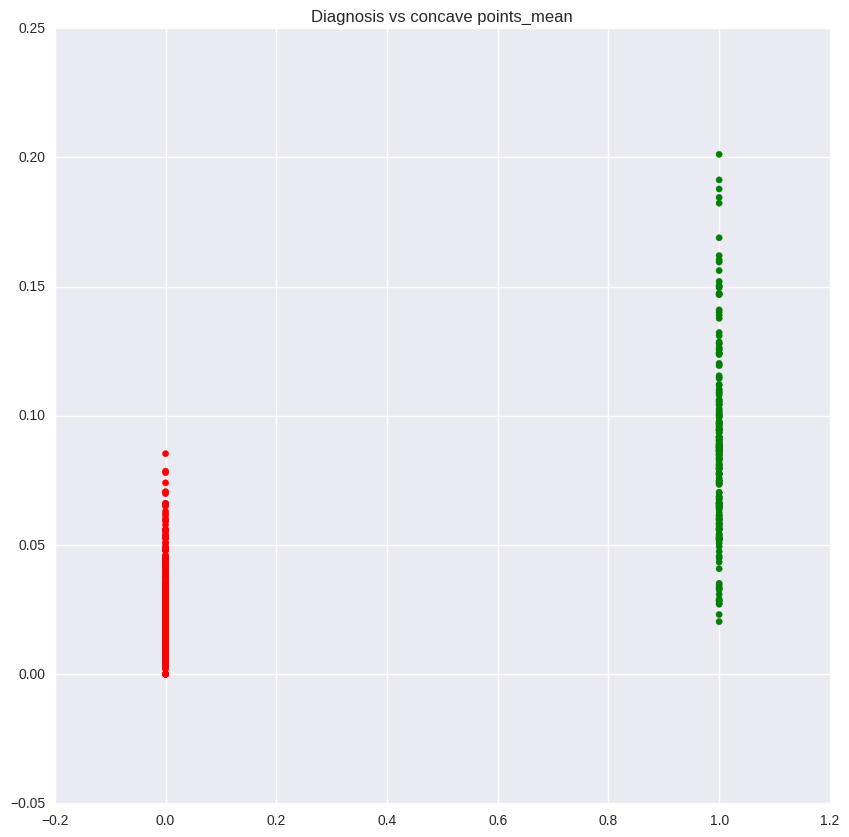

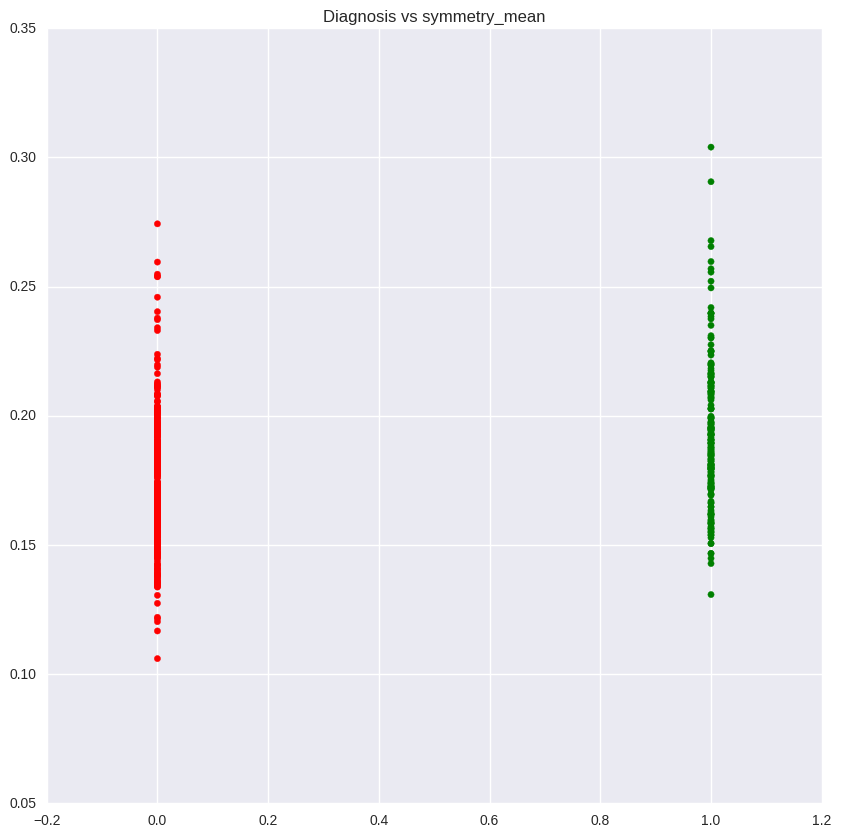

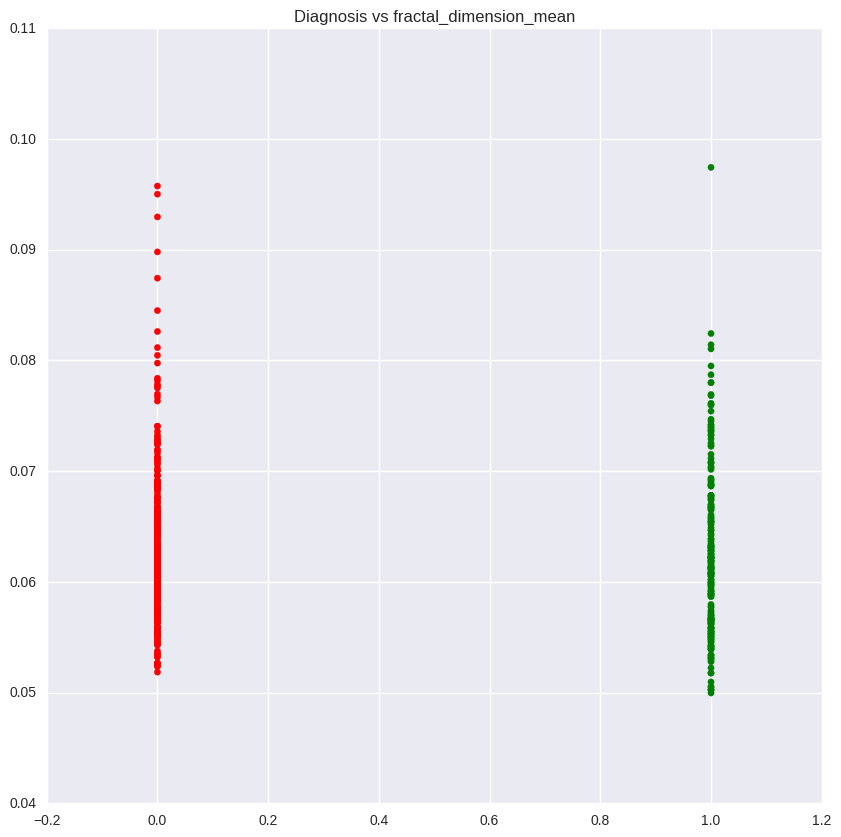

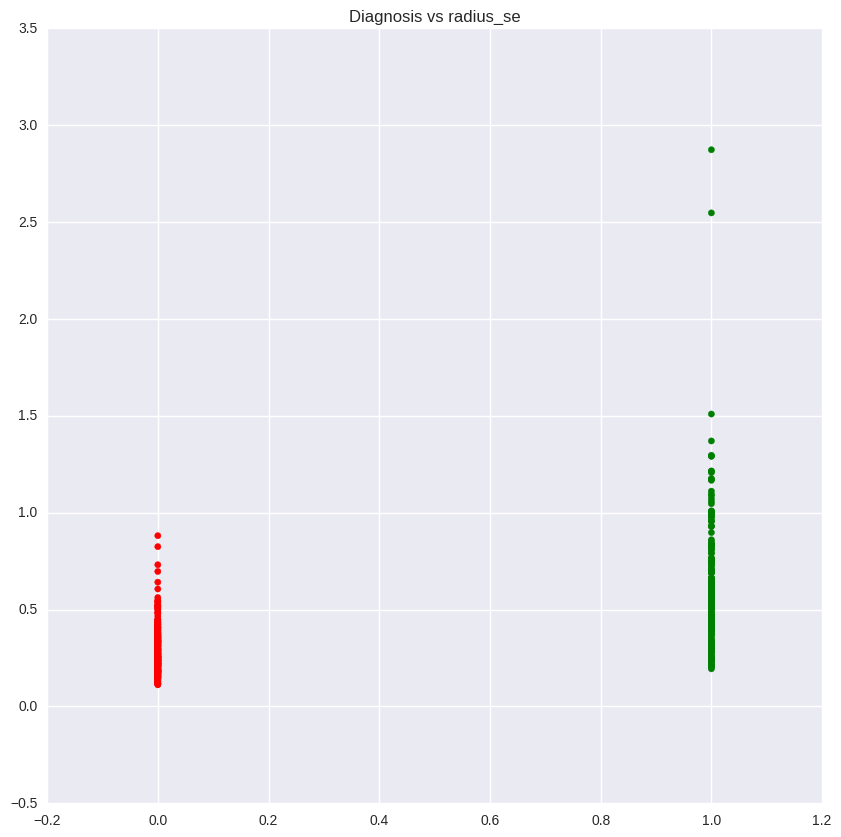

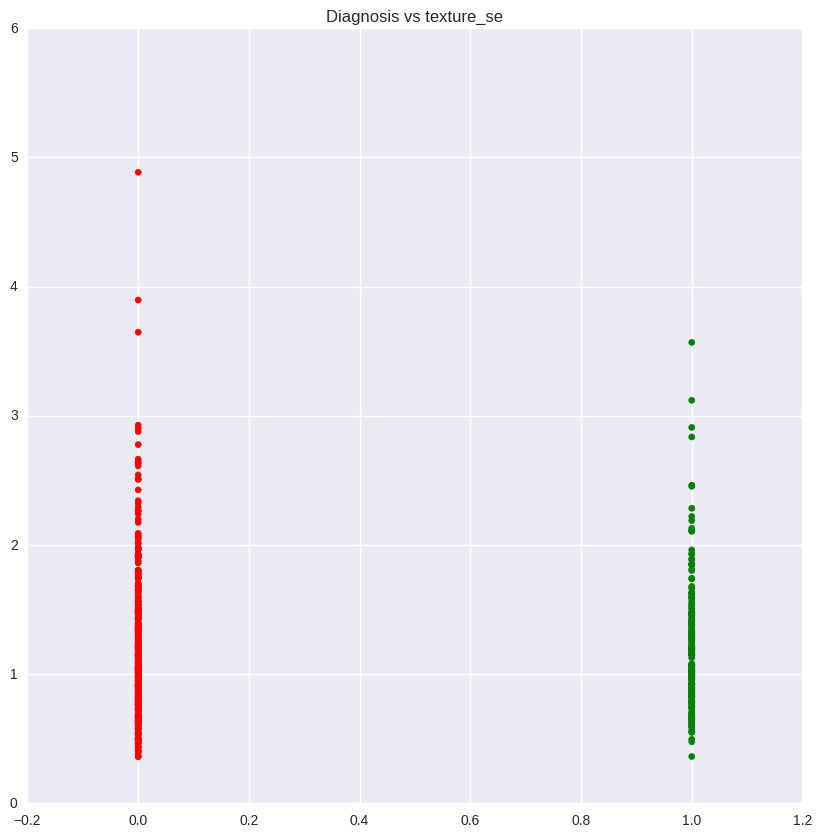

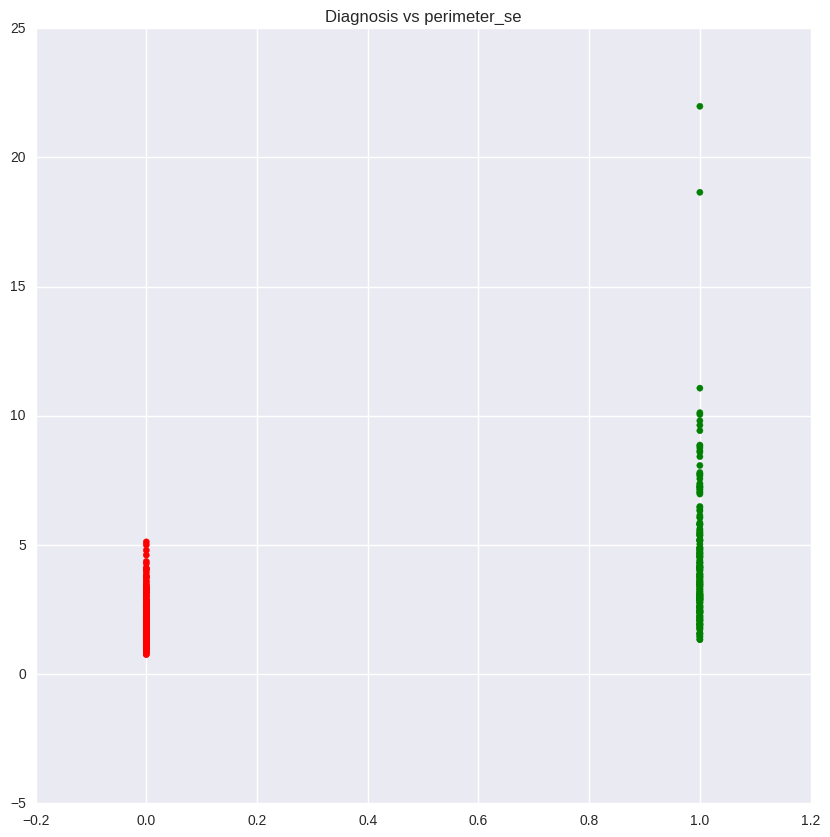

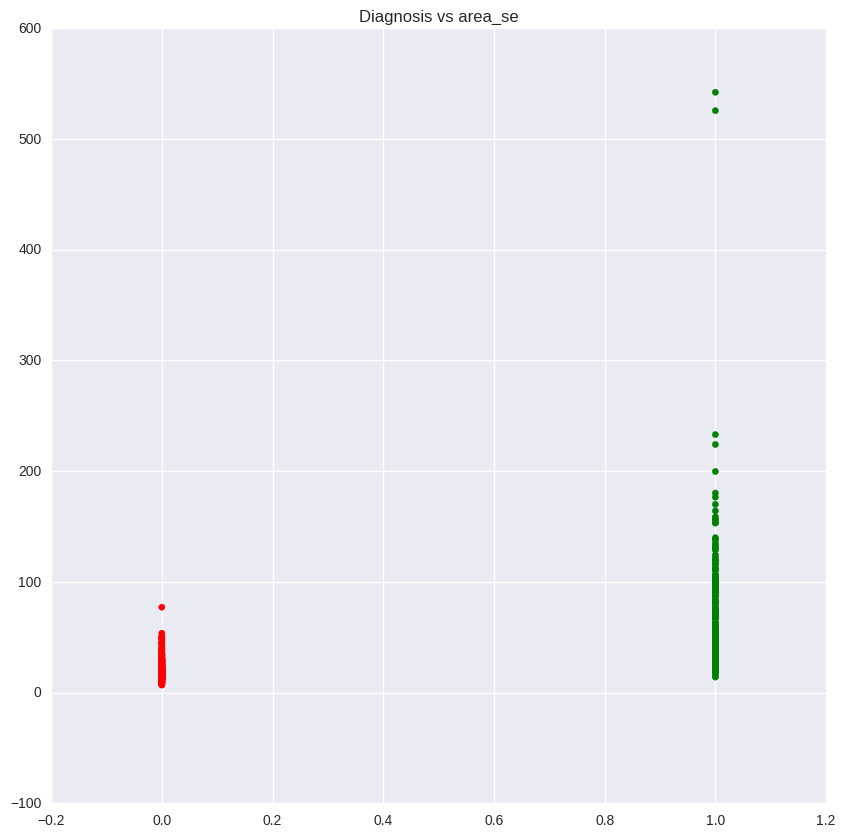

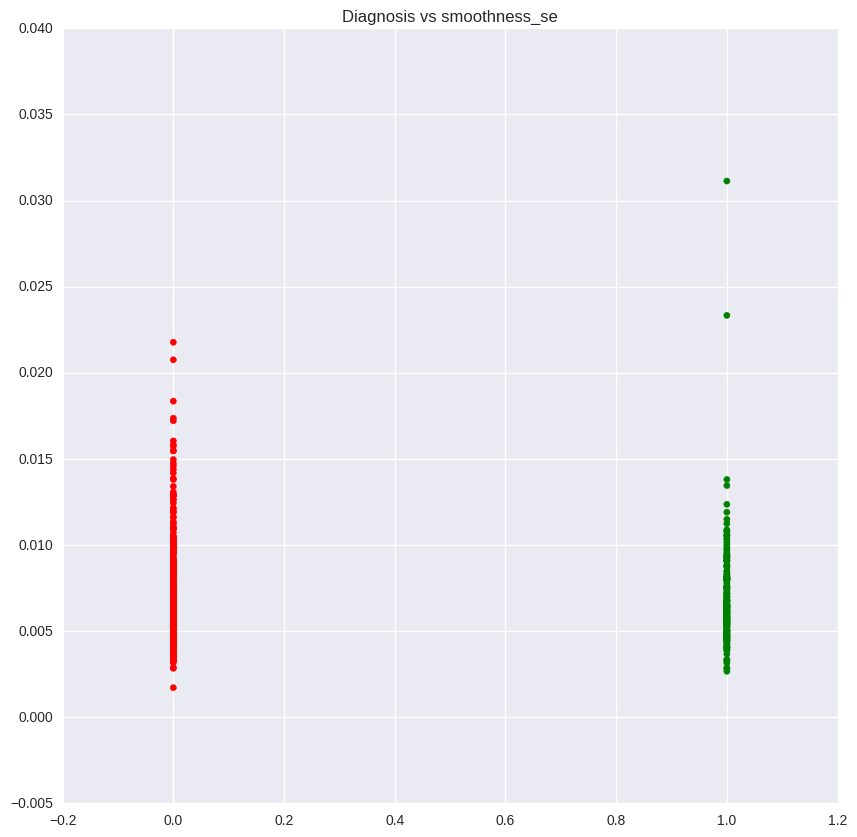

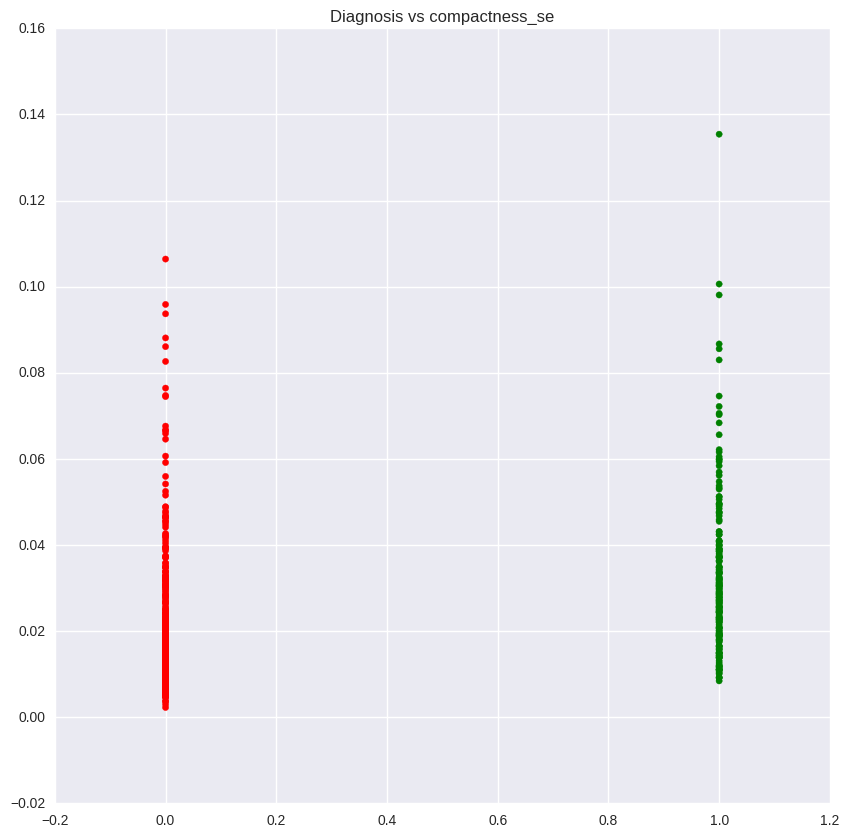

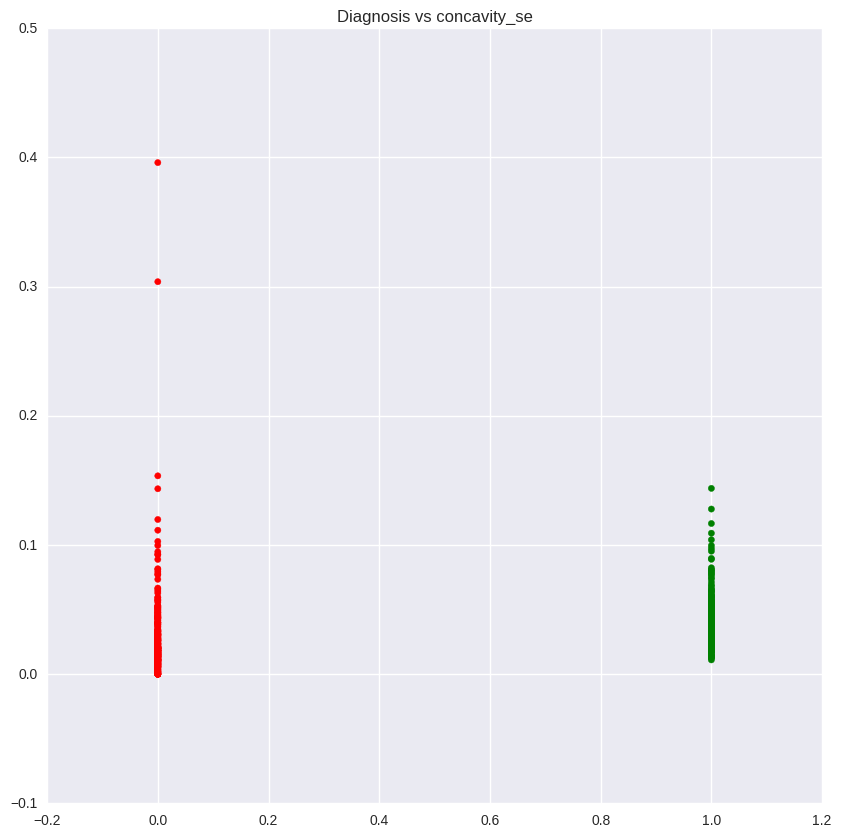

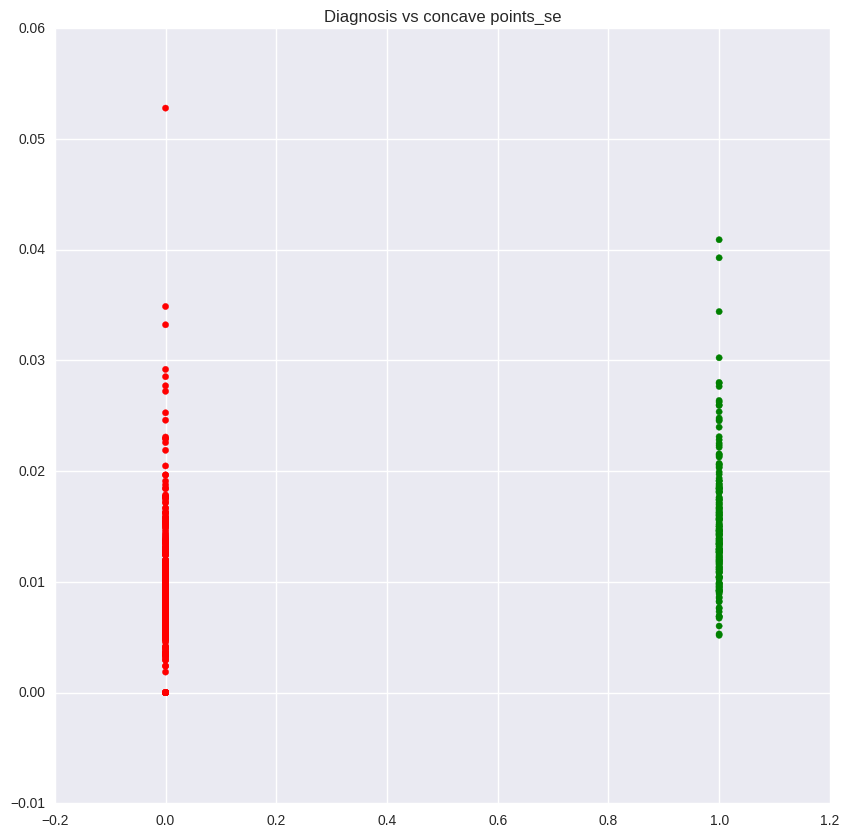

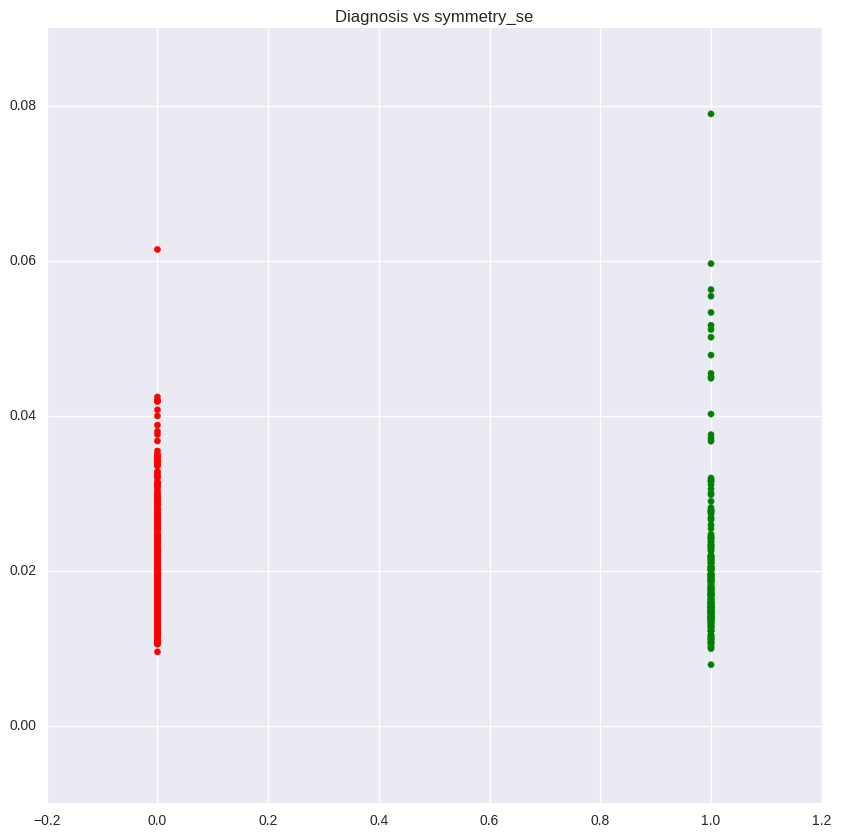

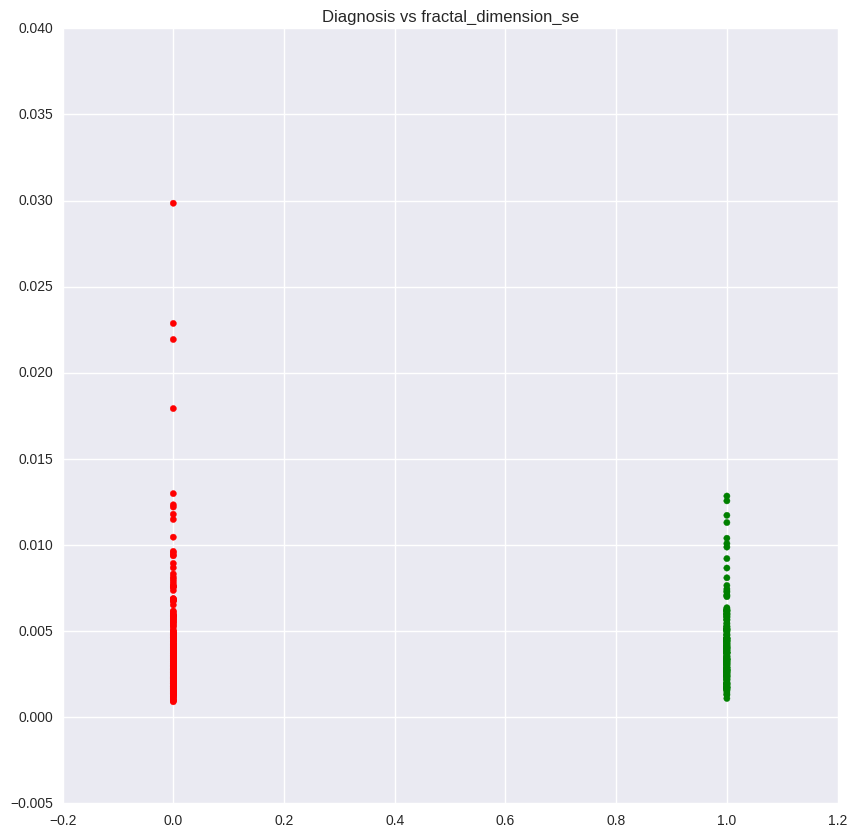

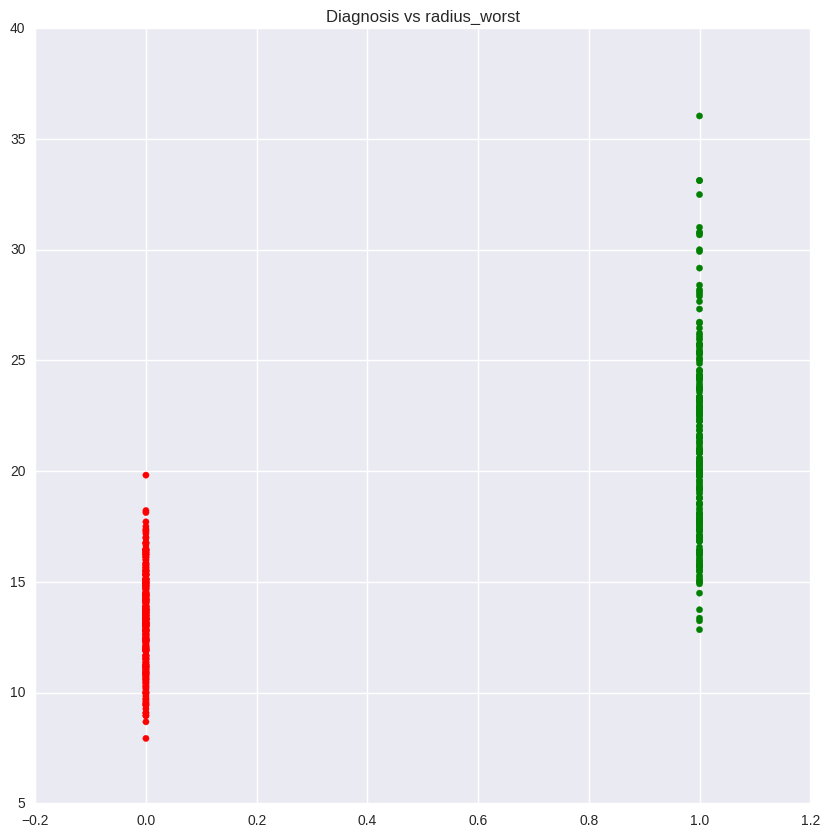

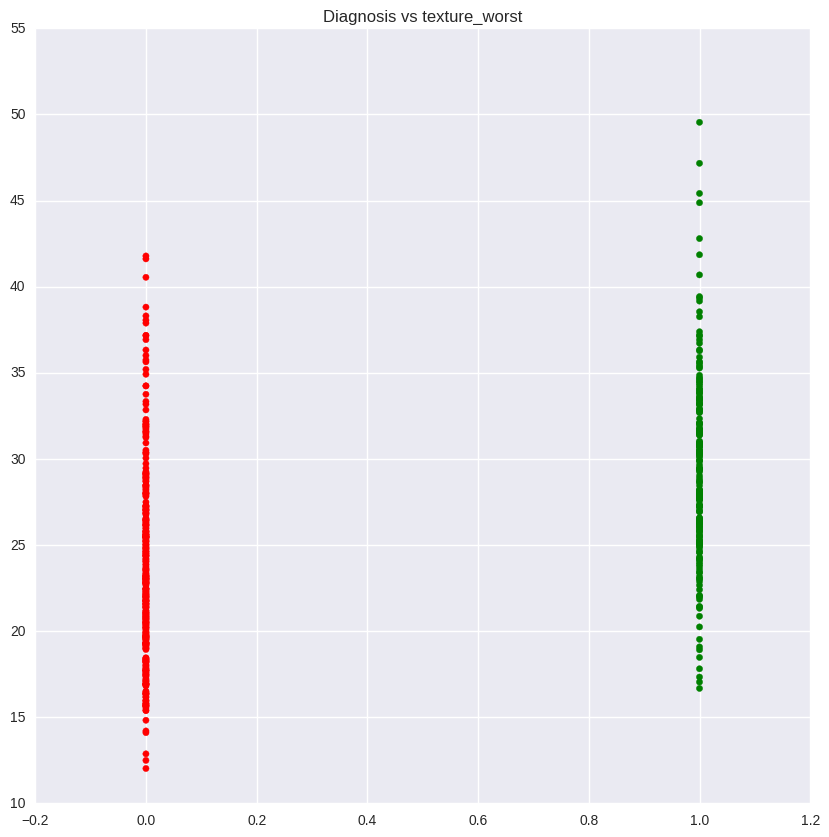

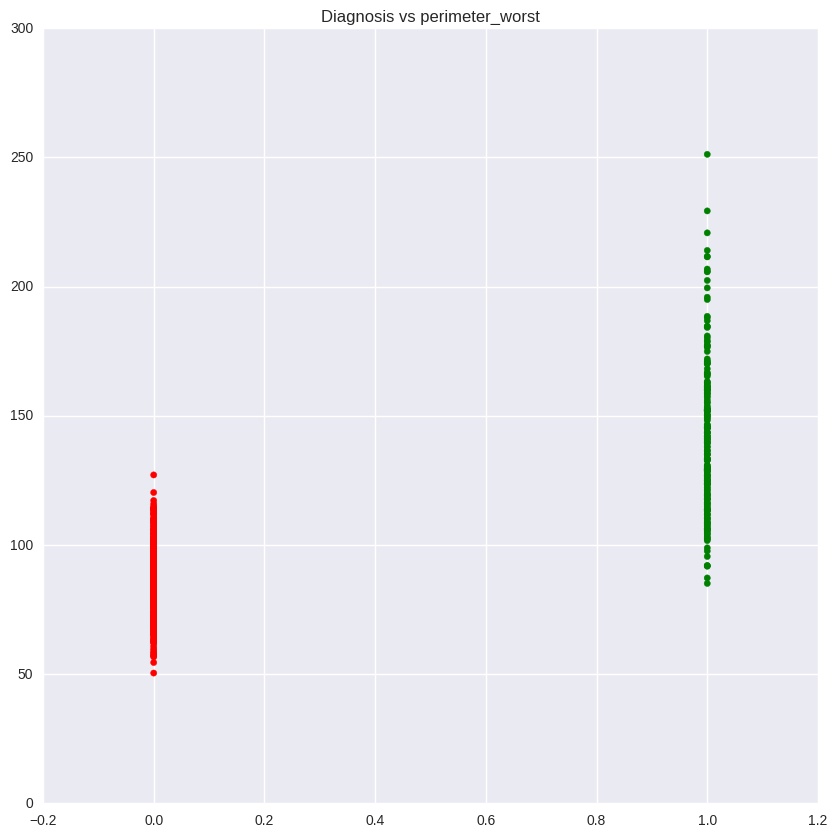

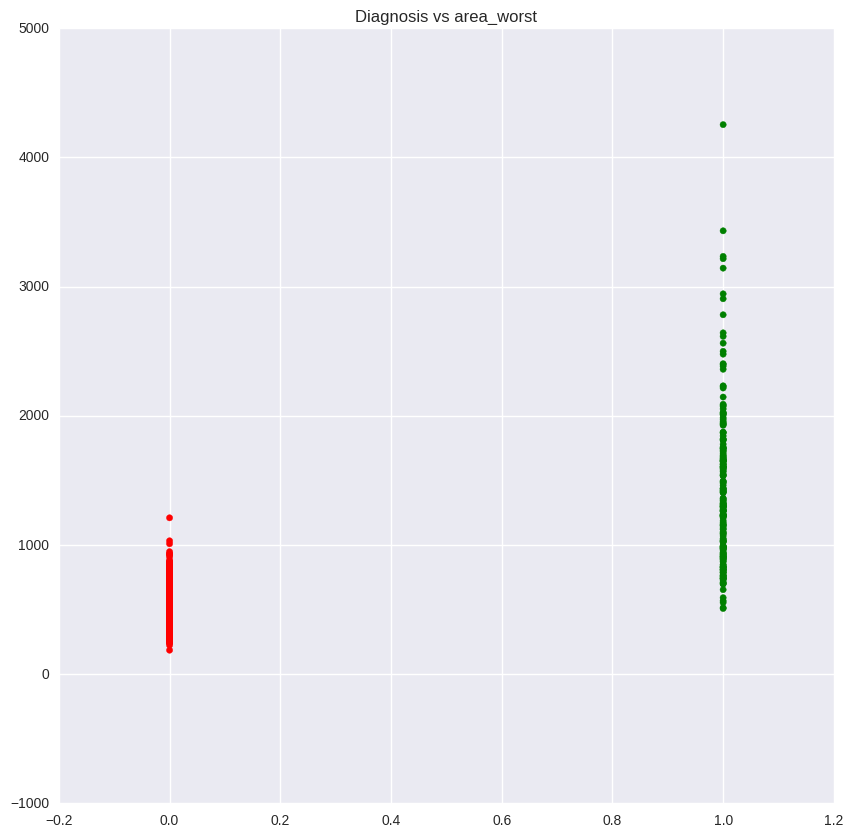

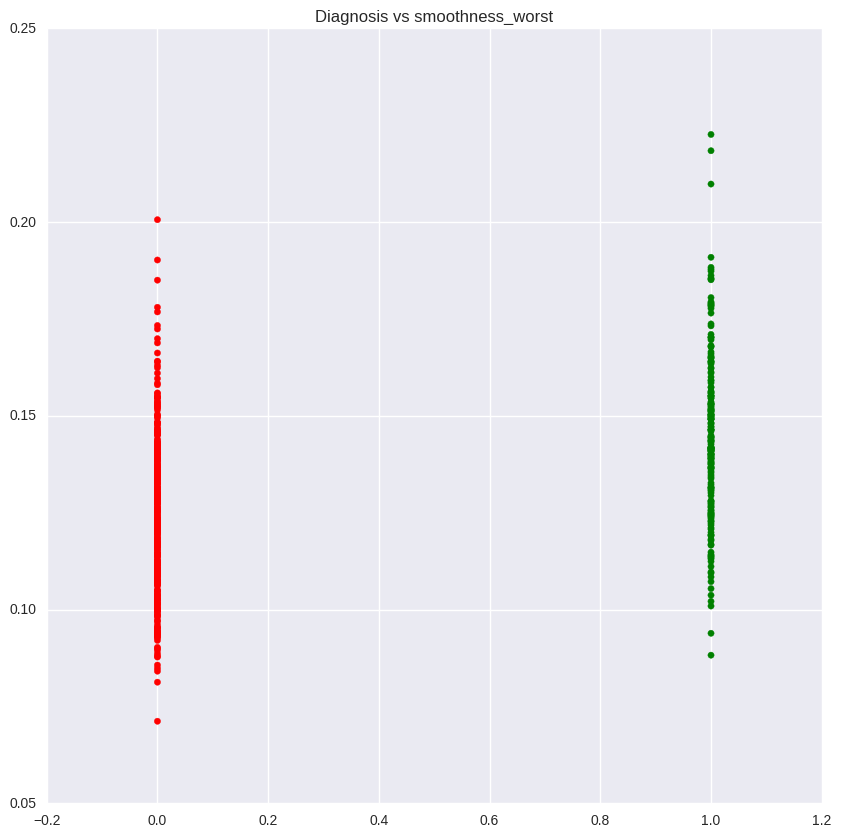

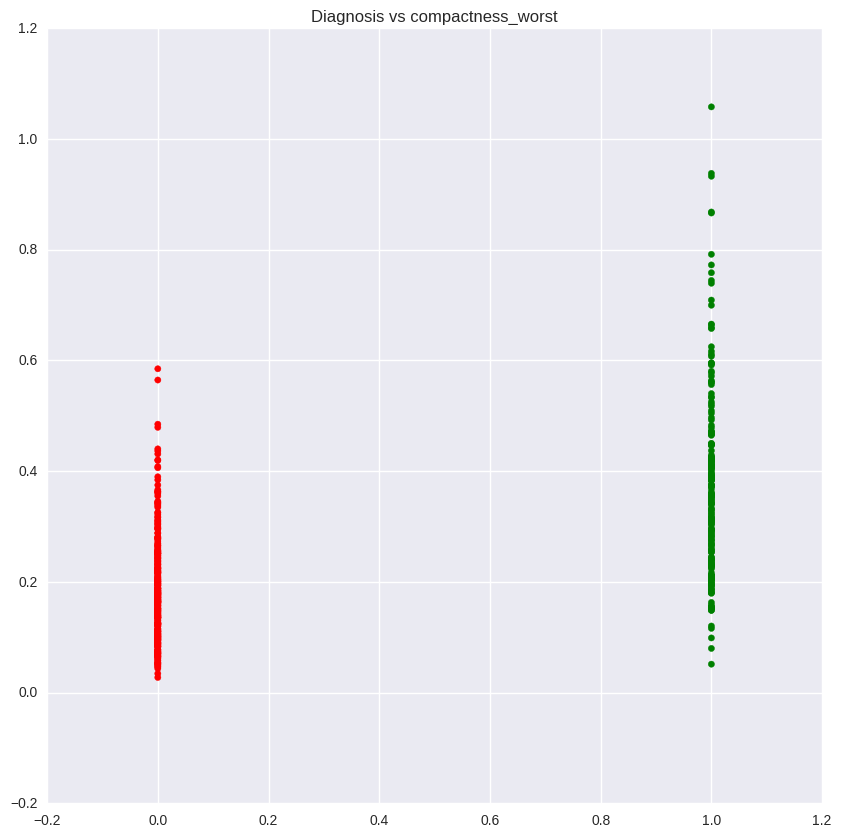

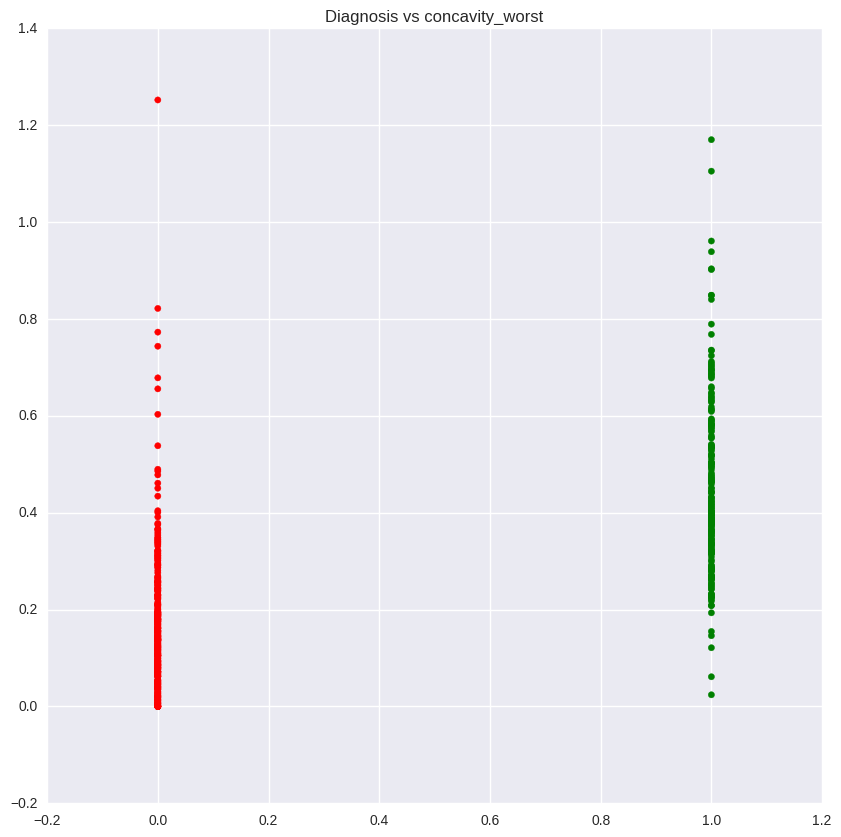

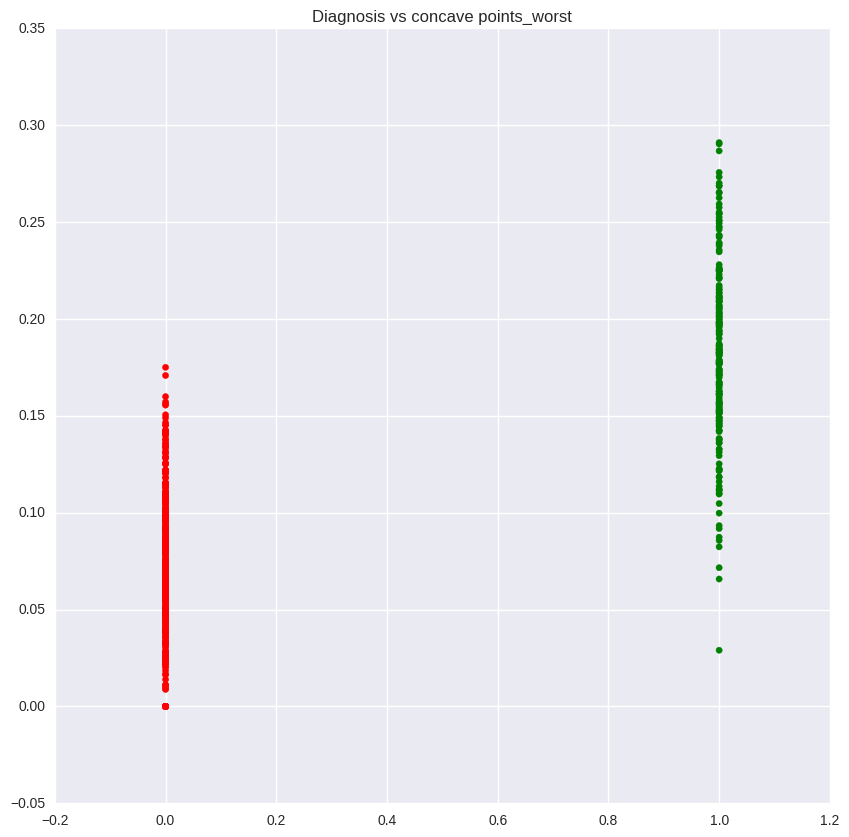

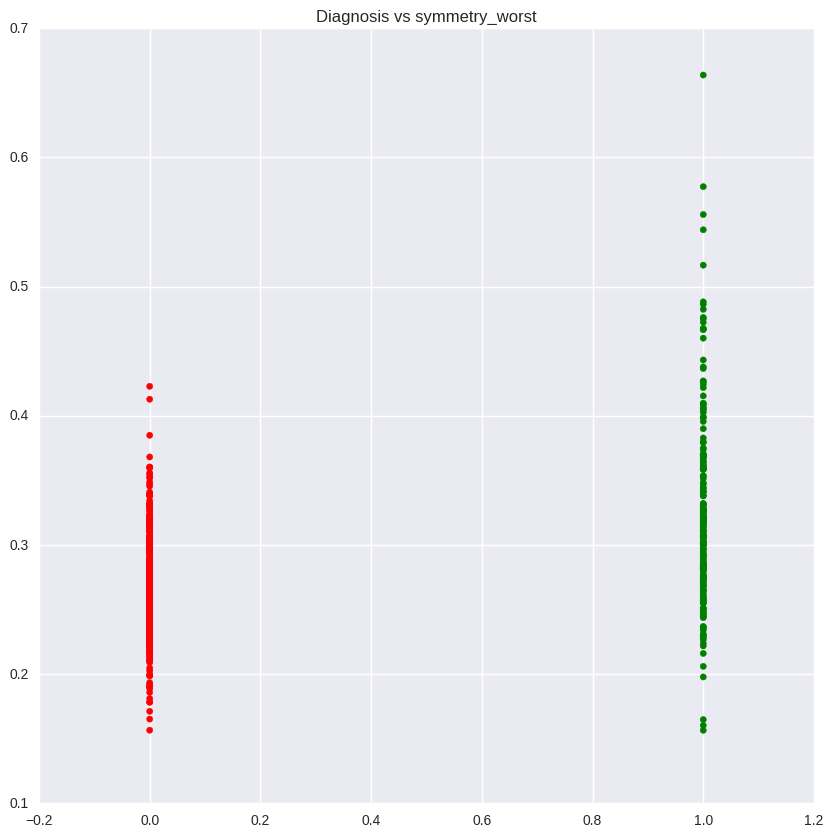

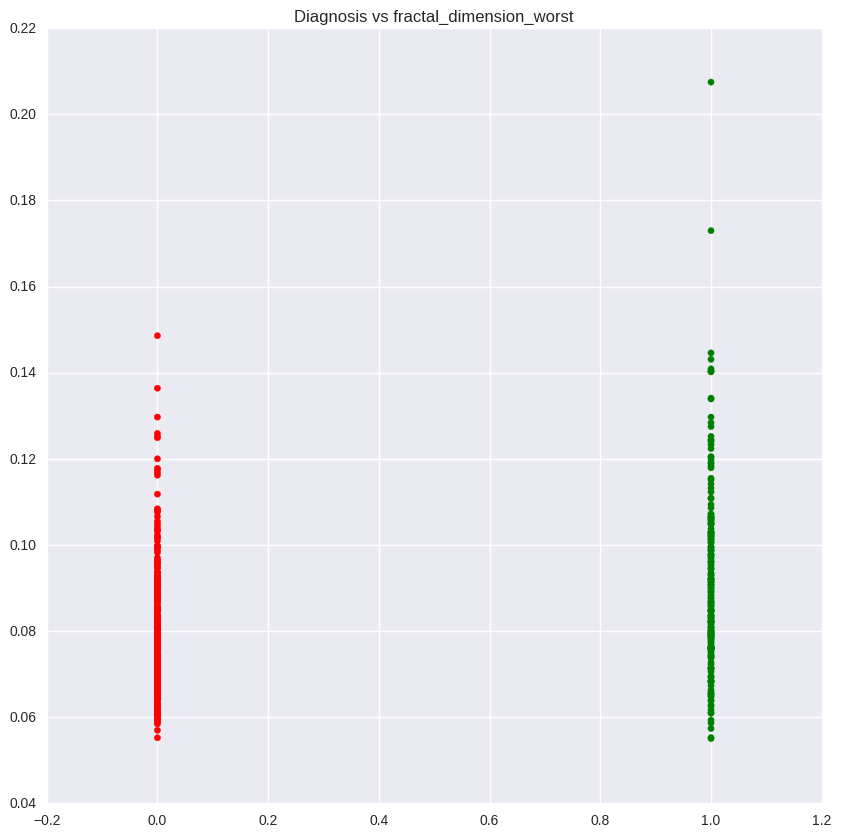

In [31]:
for columns in feature:
    plt.figure(figsize=(10,10))
    plt.scatter(x='diagnosis', y= columns, data= data, color = ['green'if i==1 else 'red' for  i in data['diagnosis']])
    sns.plt.title('Diagnosis vs ' + columns)
print('SCATTER PLOT OF FEATURE AGAINST DIAGNOSIS M=1 and B=0') 

##### Principal component analysis and it's Scatter Plot - PCA

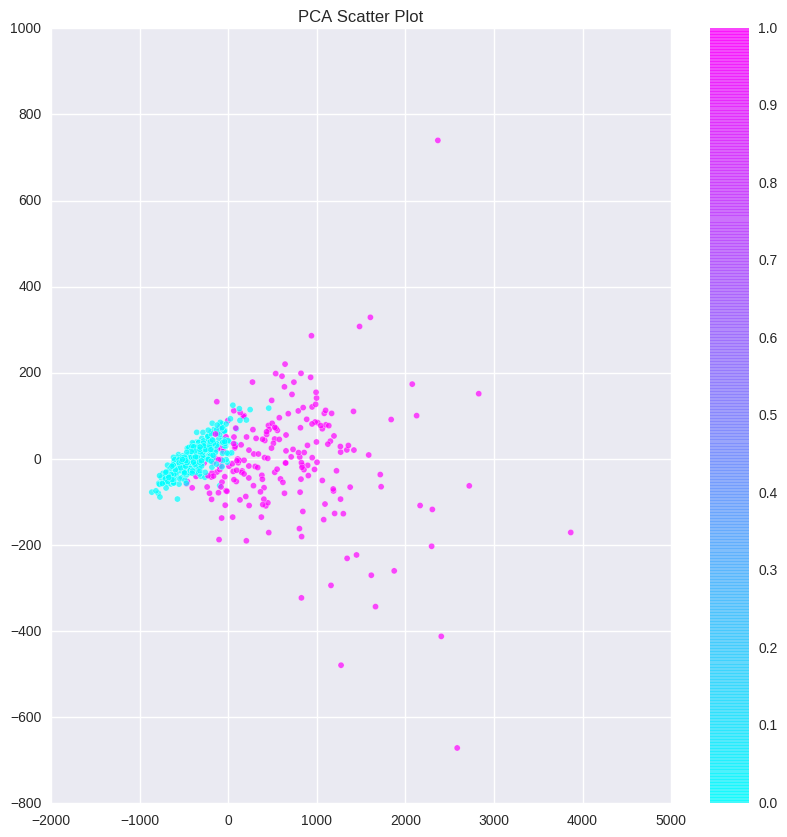

In [14]:
from sklearn.decomposition import PCA 
X = feature.values
pca = PCA(n_components=2) #Binary Classifier
pca = pca.fit_transform(X)
plt.figure(figsize = (10,10))
plt.scatter(pca[:,0],pca[:,1], c = data['diagnosis'], cmap = "cool", edgecolor = "w", alpha=0.7)
plt.colorbar()
plt.title('PCA Scatter Plot')

## PREDICTION THE DATA USING RANDOM FOREST AND  LOGISTIC REGRESSION

##### CATAGORIING DATA

In [15]:
x = feature
y=data['diagnosis']



In [16]:
y = pd.DataFrame(y)

In [17]:
y

,diagnosis
0,1
1,1
2,1
3,1
4,1
5,1
6,1
7,1
8,1
9,1


##### Splitting the dataset

In [18]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [19]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

##### Model Selection

In [20]:
# 1-using randam forest
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, Y_train)


/home/nbuser/anaconda3_23/lib/python3.4/site-packages/IPython/kernel/__main__.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=0,
            verbose=0, warm_start=False)

In [21]:
Y_pred = classifier.predict(X_test)

In [22]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(Y_test, Y_pred)
Accuracy = accuracy_score(Y_test, Y_pred)

In [23]:
cm

array([[89,  1],
       [ 1, 52]])

In [24]:

Accuracy

0.98601398601398604

In [25]:
# 2 using logistic regration
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, Y_train)

/home/nbuser/anaconda3_23/lib/python3.4/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [26]:
Y_pred = classifier.predict(X_test)

In [27]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm1 = confusion_matrix(Y_test, Y_pred)
Accuracy1 = accuracy_score(Y_test, Y_pred)

In [28]:
cm1


array([[87,  3],
       [ 3, 50]])

In [29]:
Accuracy

0.98601398601398604

## conclution

#### Random Forest model is better than Logistic Regression